In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# to read a directory on my PC
import glob

In [3]:
# regex to take dates from file names
import re

In [4]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

In [8]:
# list the files in the directory, will use the list of file names to create the Dataframes
files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*_cleaned.csv")

testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")

# eliminate files that are names autotrader1*.csv where the same file autotrader1*_cleaned.csv exists
test_to_delete = []
for i in range(len(files)-1):
    if files[i][0:testLength] == files[i+1][0:testLength]:
        test_to_delete.append(files[i])

files = sorted(list(set(files)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  62
first file  C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120180506_cleaned.csv
last file  C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120190705_cleaned.csv


In [9]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets, df[0] to df[n]
df = []

for i in range(len(files)):
    df.append(pd.read_csv(files[i], low_memory=False))
    
print(len(files),"dataframes created")

62 dataframes created


In [10]:
# data collected
dataCollected = 0
for i in range(len(files)):
    dataCollected = dataCollected + df[i].shape[0]*df[i].shape[1]

dataCollected

1028534374

In [11]:
# exploring the general data
#df[-1].head()
#df[-1].tail()
df[-1].info()
#df[-1].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497565 entries, 0 to 497564
Data columns (total 34 columns):
cars                     497565 non-null int64
name                     497565 non-null object
address                  0 non-null float64
dealer_url               497565 non-null object
dealerReviewValue        395056 non-null float64
numberOfDealerReview     395056 non-null float64
veh_id                   497565 non-null int64
description              497565 non-null object
price                    497565 non-null object
registration             474727 non-null object
miles                    495630 non-null object
transmission             494284 non-null object
engine                   481704 non-null object
fuel                     482827 non-null object
advert_type              497565 non-null object
page_type                497565 non-null object
condition                497565 non-null object
writeOffCategory         5102 non-null object
manufacturerApproved     497565

In [12]:
# #check for double counting with veh_id in all DataFrames
# double_count = []
# for i in range(len(files)):
#     double_count.append(df[i].veh_id.count() - len(df[i].veh_id.unique()))
# #double_count

In [13]:
# we will create a summary DataFrame that has dates as an "index" and a number of columns

# # create an index of dates for use in all dataframes
# date = []
# for i in range(len(files)):
#     date.append((re.search('(?<=autotrader1)(.[0-9]*?)(?=_cleaned.csv)', files[i])).group(0)[6:8]+"/"+
# (re.search('(?<=autotrader1)(.[0-9]*?)(?=_cleaned.csv)', files[i])).group(0)[4:6]+"/"+
# (re.search('(?<=autotrader1)(.[0-9]*?)(?=_cleaned.csv)', files[i])).group(0)[0:4])


# create an index of dates for use in all dataframes
date = []
for i in range(len(files)):
    date.append((re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[6:8]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[4:6]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [14]:
# create the start of the summary dataFrame
data = {'Date': date}

df_summary = pd.DataFrame(data, columns=['Date'])

In [15]:
#df_summary
#df_summary.head()
df_summary.tail()

,Date
57,07/06/2019
58,14/06/2019
59,22/06/2019
60,28/06/2019
61,05/07/2019


In [16]:
# first columns will be condition (new, nearly new, used)
df[-1]['condition'].unique()

array(['Used', 'Nearly New', 'New'], dtype=object)

In [17]:
# each cell will have the total new, nearly new, used for that date etc
# create lists for each column first
total_condition = [] # this is also the total rows in each dataframe
used = []
nearlynew = []
new = []
for i in range(len(files)):
    total_condition.append(df[i]['condition'].count())
    used.append(df[i]['condition'].value_counts()['Used'])
    nearlynew.append(df[i]['condition'].value_counts()['Nearly New'])
    new.append(df[i]['condition'].value_counts()['New'])

In [18]:
# add the lists to the dateFrame
df_summary['Total Cars'] = total_condition
df_summary['New'] = new
df_summary['Nearly New'] = nearlynew
df_summary['Used'] = used

In [19]:
#df_summary
#df_summary.head()
df_summary.tail()
#new[-15:]
#df_summary.info()

,Date,Total Cars,New,Nearly New,Used
57,07/06/2019,507866,29878,65179,412809
58,14/06/2019,509138,33124,65846,410168
59,22/06/2019,502748,34823,66047,401878
60,28/06/2019,496724,25329,65892,405503
61,05/07/2019,497565,22753,67566,407246


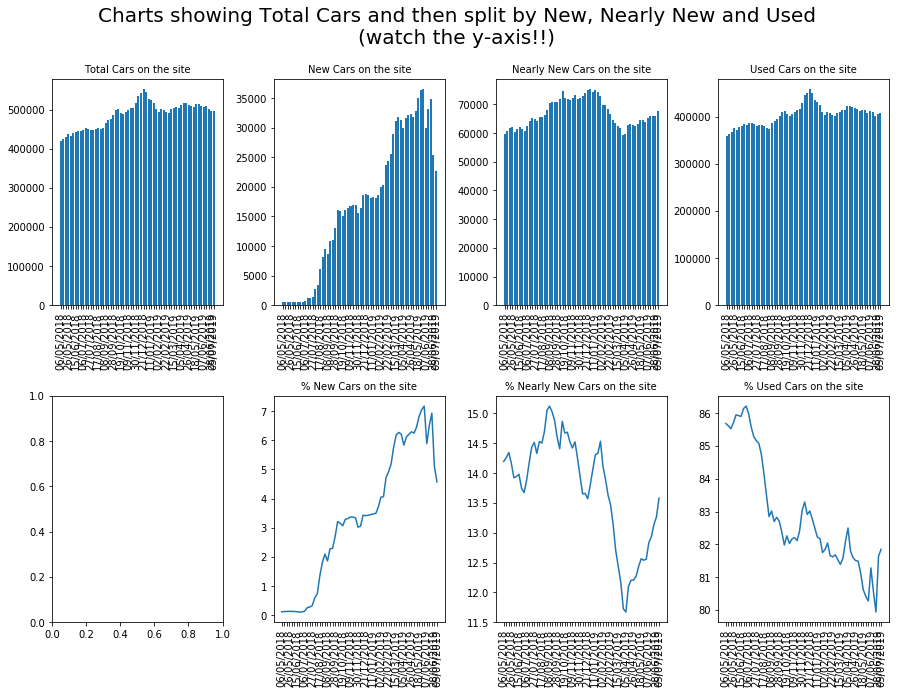

In [20]:
# plot 8 car charts of Total cars, New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['Total Cars']
ax[0,0].set_title('Total Cars on the site', fontsize=10)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].bar(x, y1)

y2 = df_summary['New']
ax[0,1].set_title('New Cars on the site', fontsize=10)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].bar(x, y2)

y3 = df_summary['Nearly New']
ax[0,2].set_title('Nearly New Cars on the site', fontsize=10)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].bar(x, y3)

y4 = df_summary['Used']
ax[0,3].set_title('Used Cars on the site', fontsize=10)
ax[0,3].set_xticklabels(labels, rotation = 90)
ax[0,3].bar(x, y4)

#y5 = (df_summary['Total Cars']/df_summary['Total Cars'])*100
#ax[1,0].set_title('% Total Cars on the site', fontsize=10)
#ax[1,0].set_xticklabels(labels, rotation = 90)
#ax[1,0].plot(x, y5)

y6 = (df_summary['New']/df_summary['Total Cars'])*100
ax[1,1].set_title('% New Cars on the site', fontsize=10)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].plot(x, y6)

y7 = (df_summary['Nearly New']/df_summary['Total Cars'])*100
ax[1,2].set_title('% Nearly New Cars on the site', fontsize=10)
ax[1,2].set_xticklabels(labels, rotation = 90)
ax[1,2].plot(x, y7)

y8 = (df_summary['Used']/df_summary['Total Cars'])*100
ax[1,3].set_title('% Used Cars on the site', fontsize=10)
ax[1,3].set_xticklabels(labels, rotation = 90)
ax[1,3].plot(x, y8)

if savePNG == 1:
    plt.savefig('Auto Trader - 8 charts on cars by condition.png', bbox_inches = 'tight')

plt.show()

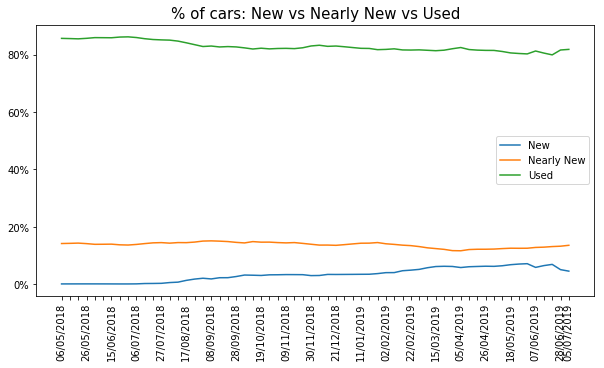

In [21]:
# plot 1 car charts of Total cars, New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(figsize=(10,5))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = (df_summary['New']/df_summary['Total Cars'])*100
y2 = (df_summary['Nearly New']/df_summary['Total Cars'])*100
y3 = (df_summary['Used']/df_summary['Total Cars'])*100

ax.set_title('% of cars: New vs Nearly New vs Used', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
plt.legend(('New', 'Nearly New', 'Used'))
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
plt.show()

In [22]:
# explore dealer, video and image data

In [23]:
# add in a column for number of forecourts, number of videos and total images

cars = []
hasVideo = []
totalImages = []
for i in range(len(files)):
    cars.append(df[i]['name'].nunique())
    hasVideo.append(df[i][(df[i]['hasVideo'] == True)]['cars'].count())
    totalImages.append(df[i]['totalImages'].sum())

df_summary['forecourts'] = cars
df_summary['hasVideo'] = hasVideo
df_summary['totalImages'] = totalImages

In [24]:
df_summary.head()

,Date,Total Cars,New,Nearly New,Used,forecourts,hasVideo,totalImages
0,06/05/2018,419905,505,59610,359790,12703,66068,7841570
1,11/05/2018,425506,542,60671,364293,12736,67758,8028698
2,19/05/2018,430633,572,61771,368290,12736,70423,8170129
3,26/05/2018,437824,597,62012,375215,12778,71198,8326265
4,01/06/2018,433471,580,60343,372548,12768,70863,8222972


In [25]:
#df[-1]['hasVideo'].unique()
#df[-1]['name'].describe()
df[-1]['totalImages'].describe()

count    497565.000000
mean         21.805889
std          14.185031
min           0.000000
25%          12.000000
50%          20.000000
75%          28.000000
max         100.000000
Name: totalImages, dtype: float64

In [26]:
# details dealers, videos and images for new / nearly new / used for charting
new_name = []
new_hasVideo = []
new_totalImages = []
nearlyNew_name = []
nearlyNew_hasVideo = []
nearlyNew_totalImages = []
used_name = []
used_hasVideo = []
used_totalImages = []

for i in range(len(files)):
    new_name.append(df[i][(df[i]['condition'] == 'New')]['name'].nunique())
    new_hasVideo.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True)]['cars'].count())
    new_totalImages.append(df[i][(df[i]['condition'] == 'New')]['totalImages'].sum())
    nearlyNew_name.append(df[i][(df[i]['condition'] == 'Nearly New')]['name'].nunique())
    nearlyNew_hasVideo.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True)]['cars'].count())
    nearlyNew_totalImages.append(df[i][(df[i]['condition'] == 'Nearly New')]['totalImages'].sum())    
    used_name.append(df[i][(df[i]['condition'] == 'Used')]['name'].nunique())
    used_hasVideo.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True)]['cars'].count())
    used_totalImages.append(df[i][(df[i]['condition'] == 'Used')]['totalImages'].sum())    


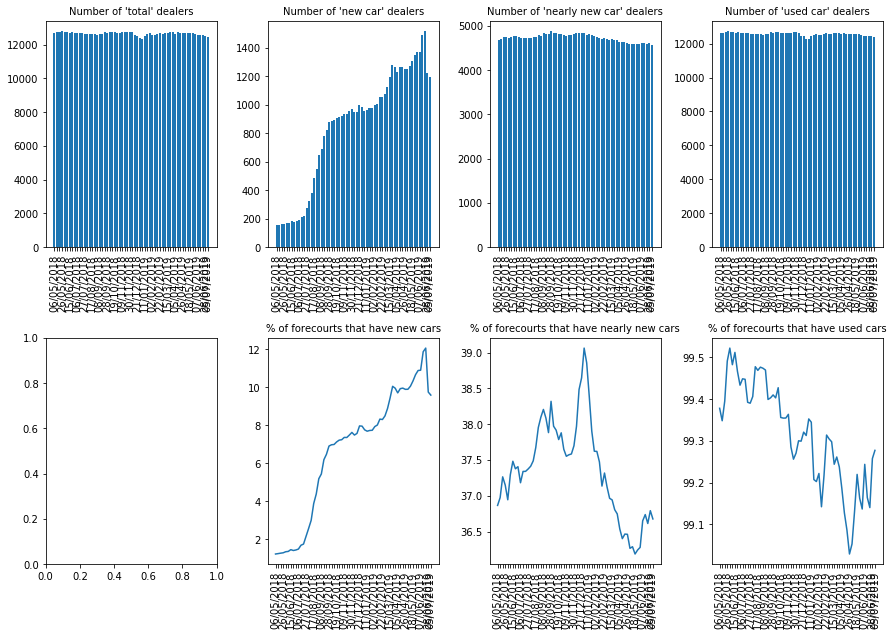

In [27]:
# plot 8 charts of number of dealers for total / new / nearly new / used

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

    
y0 = df_summary['forecourts']
ax[0,0].set_title('Number of \'total\' dealers', fontsize=10)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].bar(x, y0)
    
y1 = new_name
ax[0,1].set_title('Number of \'new car\' dealers', fontsize=10)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].bar(x, y1)

y2 = nearlyNew_name
ax[0,2].set_title('Number of \'nearly new car\' dealers', fontsize=10)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].bar(x, y2)

y3 = used_name
ax[0,3].set_title('Number of \'used car\' dealers', fontsize=10)
ax[0,3].set_xticklabels(labels, rotation = 90)
ax[0,3].bar(x, y3)

y4 = (new_name/df_summary['forecourts'])*100
ax[1,1].set_title('% of forecourts that have new cars', fontsize=10)
ax[1,1].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(x, y4)

y5 = (nearlyNew_name/df_summary['forecourts'])*100
ax[1,2].set_title('% of forecourts that have nearly new cars', fontsize=10)
ax[1,2].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,2].plot(x, y5)

y6 = (used_name/df_summary['forecourts'])*100
ax[1,3].set_title('% of forecourts that have used cars', fontsize=10)
ax[1,3].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,3].plot(x, y6)

if savePNG == 1:
    plt.savefig('Auto Trader - 6 charts on car dealers by new nearly new used.png', bbox_inches = 'tight')

plt.show()

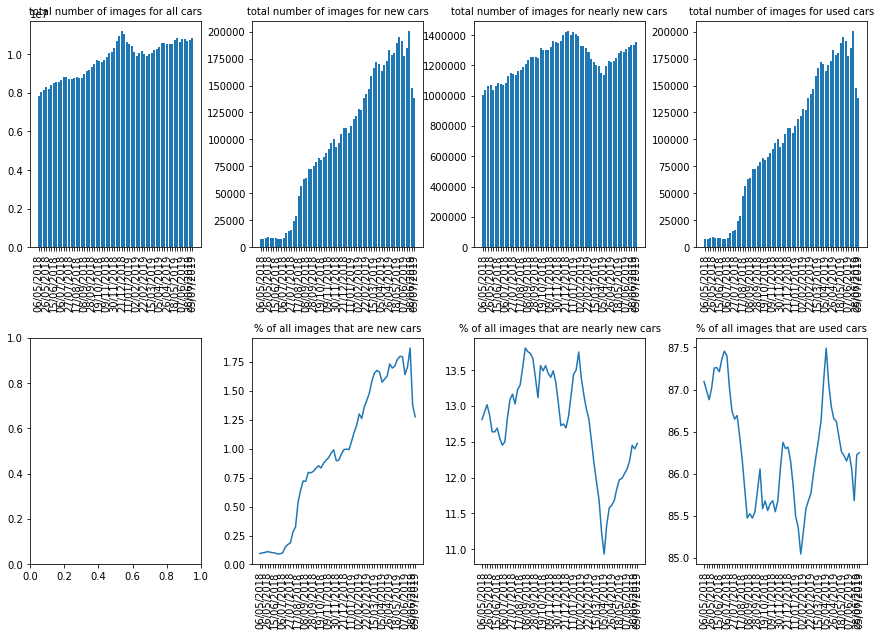

In [28]:
# plot 8 charts of number of images for new / nearly new / used

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y0 = df_summary['totalImages']
ax[0,0].set_title('total number of images for all cars', fontsize=10)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].bar(x, y0)

y1 = new_totalImages
ax[0,1].set_title('total number of images for new cars', fontsize=10)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].bar(x, y1)

y2 = nearlyNew_totalImages
ax[0,2].set_title('total number of images for nearly new cars', fontsize=10)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].bar(x, y2)

y3 = new_totalImages
ax[0,3].set_title('total number of images for used cars', fontsize=10)
ax[0,3].set_xticklabels(labels, rotation = 90)
ax[0,3].bar(x, y3)

y4 = (new_totalImages/df_summary['totalImages'])*100
ax[1,1].set_title('% of all images that are new cars', fontsize=10)
ax[1,1].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(x, y4)

y5 = (nearlyNew_totalImages/df_summary['totalImages'])*100
ax[1,2].set_title('% of all images that are nearly new cars', fontsize=10)
ax[1,2].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,2].plot(x, y5)

y6 = (used_totalImages/df_summary['totalImages'])*100
ax[1,3].set_title('% of all images that are used cars', fontsize=10)
ax[1,3].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,3].plot(x, y6)

if savePNG == 1:
    plt.savefig('Auto Trader - 6 charts on images by new nearly new used.png', bbox_inches = 'tight')

plt.show()

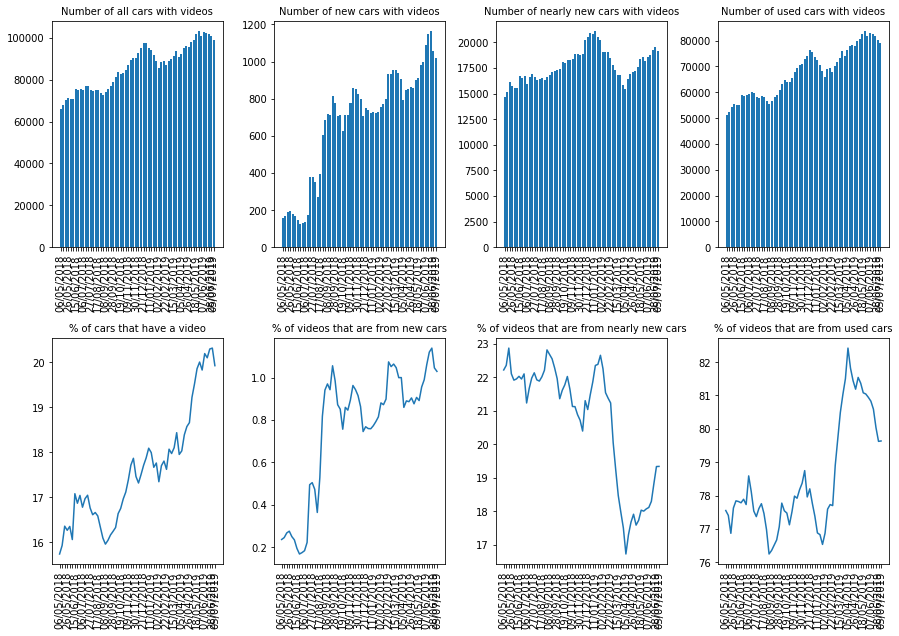

In [29]:
# plot 8 charts of number of videos for new / nearly new / used

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y0 = df_summary['hasVideo']
ax[0,0].set_title('Number of all cars with videos', fontsize=10)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].bar(x, y0)

y1 = new_hasVideo
ax[0,1].set_title('Number of new cars with videos', fontsize=10)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].bar(x, y1)

y2 = nearlyNew_hasVideo
ax[0,2].set_title('Number of nearly new cars with videos', fontsize=10)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].bar(x, y2)

y3 = used_hasVideo
ax[0,3].set_title('Number of used cars with videos', fontsize=10)
ax[0,3].set_xticklabels(labels, rotation = 90)
ax[0,3].bar(x, y3)

y7 = (df_summary['hasVideo']/df_summary['Total Cars'])*100
ax[1,0].set_title('% of cars that have a video', fontsize=10)
ax[1,0].set_xticklabels(labels, rotation = 90)
#ax.yxis.set_major_formatter(ticker.PercentFormatter())
ax[1,0].plot(x, y7)

y4 = (new_hasVideo/df_summary['hasVideo'])*100
ax[1,1].set_title('% of videos that are from new cars', fontsize=10)
ax[1,1].set_xticklabels(labels, rotation = 90)
#ax.yxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(x, y4)

y5 = (nearlyNew_hasVideo/df_summary['hasVideo'])*100
ax[1,2].set_title('% of videos that are from nearly new cars', fontsize=10)
ax[1,2].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,2].plot(x, y5)

y6 = (used_hasVideo/df_summary['hasVideo'])*100
ax[1,3].set_title('% of videos that are from used cars', fontsize=10)
ax[1,3].set_xticklabels(labels, rotation = 90)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,3].plot(x, y6)

if savePNG == 1:
    plt.savefig('Auto Trader - 8 charts on videos by new nearly new used.png', bbox_inches = 'tight')

plt.show()

In [30]:
# explore fuel type

In [31]:
# chart of fuel for new, nearly new and used cars

total_fuelPetrol = []
total_fuelDiesel = []
total_fuelElectric = []
new_fuelPetrol = []
new_fuelDiesel = []
new_fuelElectric = []
nearlyNew_fuelPetrol = []
nearlyNew_fuelDiesel = []
nearlyNew_fuelElectric = []
used_fuelPetrol = []
used_fuelDiesel = []
used_fuelElectric = []

for i in range(len(files)):
    total_fuelPetrol.append(df[i][(df[i]['fuel'] == 'Petrol')]['fuel'].count())
    total_fuelDiesel.append(df[i][(df[i]['fuel'] == 'Diesel')]['fuel'].count())
    total_fuelElectric.append(df[i][(df[i]['fuel'] == 'Electric')]['fuel'].count())
    new_fuelPetrol.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    new_fuelDiesel.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    new_fuelElectric.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())
    nearlyNew_fuelPetrol.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    nearlyNew_fuelDiesel.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    nearlyNew_fuelElectric.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    
    used_fuelPetrol.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    used_fuelDiesel.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    used_fuelElectric.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    


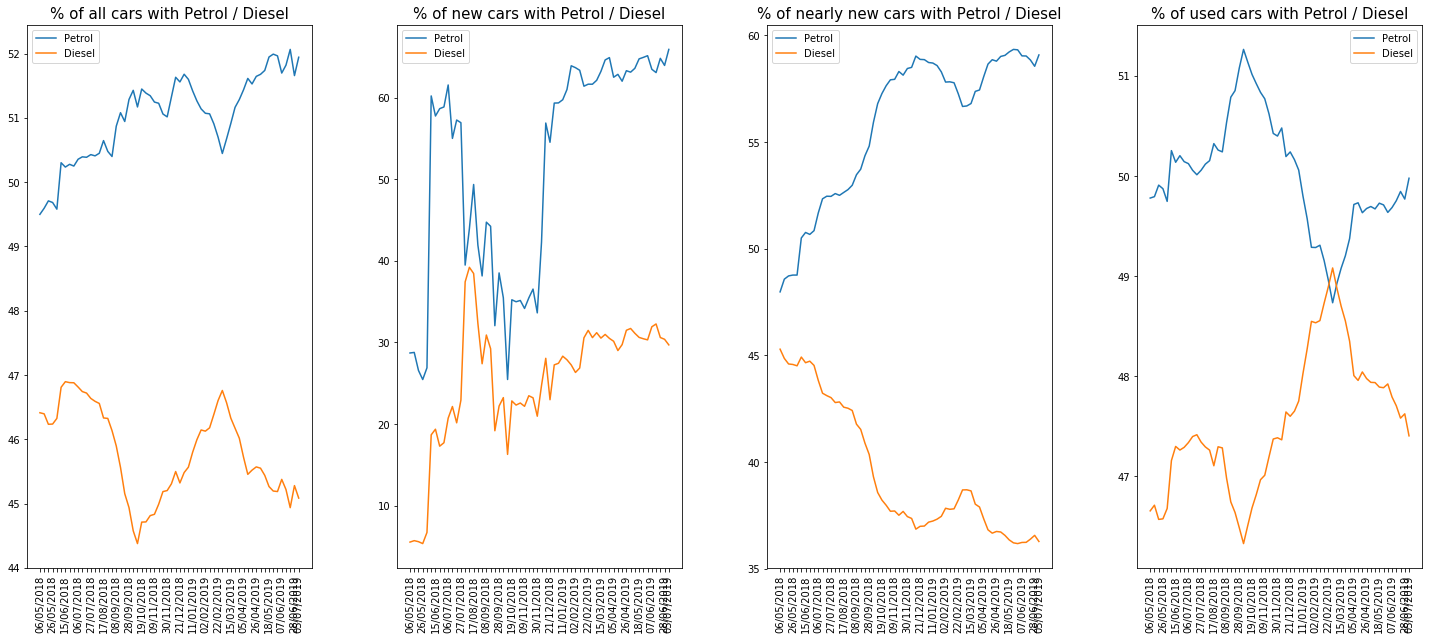

In [32]:
# plot 4 charts of number of fuel type % for total / new / nearly new / used cars

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = (total_fuelPetrol/df_summary['Total Cars'])*100
y2 = (total_fuelDiesel/df_summary['Total Cars'])*100
#y3 = (total_fuelElectric/df_summary['Total Cars'])*100
ax[0].set_title('% of all cars with Petrol / Diesel', fontsize=15)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].plot(x, y1)
ax[0].plot(x, y2)
#ax[0].plot(x, y3)
ax[0].legend(('Petrol', 'Diesel', 'Electric'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    
y4 = (new_fuelPetrol/df_summary['New'])*100
y5 = (new_fuelDiesel/df_summary['New'])*100
#y6 = (new_fuelElectric/df_summary['New'])*100
ax[1].set_title('% of new cars with Petrol / Diesel', fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].plot(x, y4)
ax[1].plot(x, y5)
#ax[0].plot(x, y6)
ax[1].legend(('Petrol', 'Diesel', 'Electric'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())    

y7 = (nearlyNew_fuelPetrol/df_summary['Nearly New'])*100
y8 = (nearlyNew_fuelDiesel/df_summary['Nearly New'])*100
#y9 = (nearlyNew_fuelElectric/df_summary['Nearly New'])*100
ax[2].set_title('% of nearly new cars with Petrol / Diesel', fontsize=15)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].plot(x, y7)
ax[2].plot(x, y8)
#ax[0].plot(x, y9)
ax[2].legend(('Petrol', 'Diesel', 'Electric'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

y10 = (used_fuelPetrol/df_summary['Used'])*100
y11 = (used_fuelDiesel/df_summary['Used'])*100
#y12 = (used_fuelElectric/df_summary['Used'])*100
ax[3].set_title('% of used cars with Petrol / Diesel', fontsize=15)
ax[3].set_xticklabels(labels, rotation = 90)
ax[3].plot(x, y10)
ax[3].plot(x, y11)
#ax[0].plot(x, y12)
ax[3].legend(('Petrol', 'Diesel', 'Electric'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - 4 charts on fuel by new nearly new used.png', bbox_inches = 'tight')

plt.show()

In [33]:
# explore transmission type

In [34]:
# chart of transmission type for new cars

total_automatic = []
total_manual = []
new_automatic = []
new_manual = []
nearlyNew_automatic = []
nearlyNew_manual = []
used_automatic = []
used_manual = []

for i in range(len(files)):
    total_automatic.append(df[i][(df[i]['transmission'] == 'Automatic')]['transmission'].count())
    total_manual.append(df[i][(df[i]['transmission'] == 'Manual')]['transmission'].count())
    new_automatic.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    new_manual.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    nearlyNew_automatic.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    nearlyNew_manual.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    used_automatic.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    used_manual.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual')]['transmission'].count())


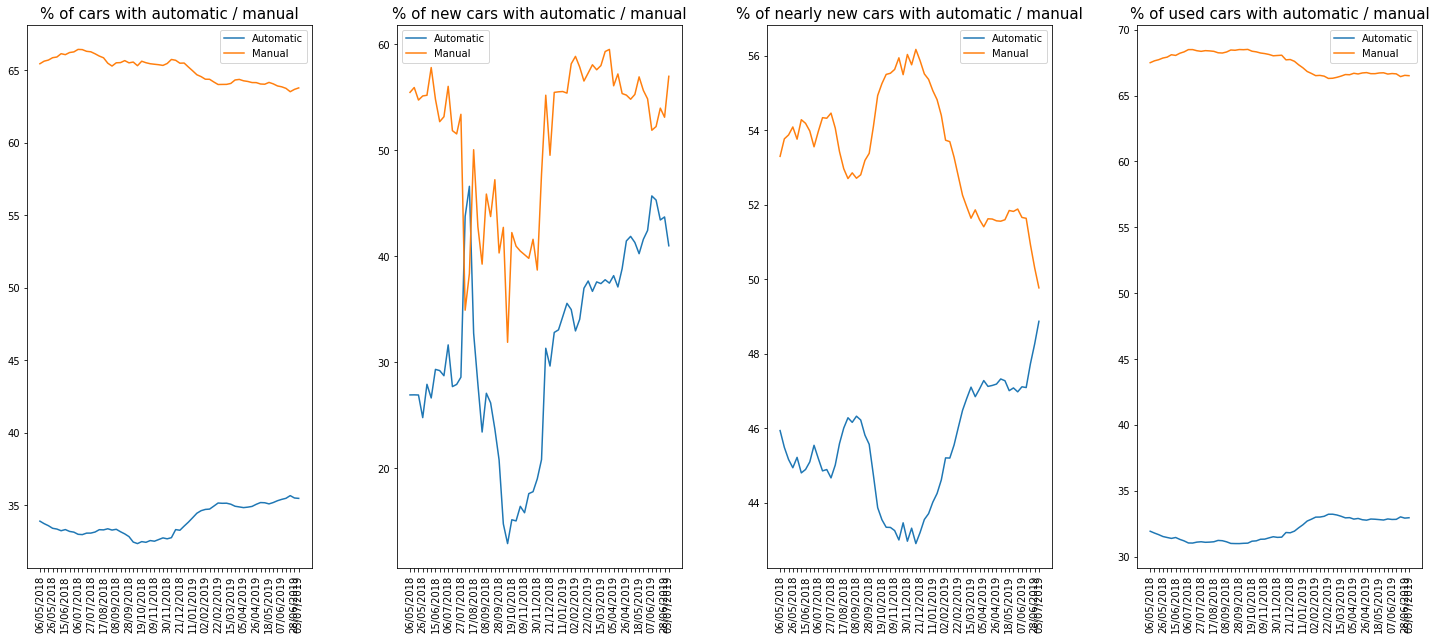

In [35]:
# plot 4 charts of number of tranmission type % for total / new / nearly new / used cars

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = (total_automatic/df_summary['Total Cars'])*100
y2 = (total_manual/df_summary['Total Cars'])*100
ax[0].set_title('% of cars with automatic / manual', fontsize=15)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].plot(x, y1)
ax[0].plot(x, y2)
ax[0].legend(('Automatic', 'Manual'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    
y3 = (new_automatic/df_summary['New'])*100
y4 = (new_manual/df_summary['New'])*100
ax[1].set_title('% of new cars with automatic / manual', fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].plot(x, y3)
ax[1].plot(x, y4)
ax[1].legend(('Automatic', 'Manual'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())    

y5 = (nearlyNew_automatic/df_summary['Nearly New'])*100
y6 = (nearlyNew_manual/df_summary['Nearly New'])*100
ax[2].set_title('% of nearly new cars with automatic / manual', fontsize=15)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].plot(x, y5)
ax[2].plot(x, y6)
#ax[0].plot(x, y9)
ax[2].legend(('Automatic', 'Manual'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

y7 = (used_automatic/df_summary['Used'])*100
y8 = (used_manual/df_summary['Used'])*100
ax[3].set_title('% of used cars with automatic / manual', fontsize=15)
ax[3].set_xticklabels(labels, rotation = 90)
ax[3].plot(x, y7)
ax[3].plot(x, y8)
#ax[0].plot(x, y12)
ax[3].legend(('Automatic', 'Manual'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - 6 charts on transmission by new nearly new used.png', bbox_inches = 'tight')

plt.show()

In [36]:
#explore prices and values

In [37]:
#df[-1]['price'].mean()

In [38]:
# chart of mean new car price

total_mean = []
new_mean = []
nearlyNew_mean = []
used_mean = []


for i in range(len(files)):
    total_mean.append(df[i]['price'].replace('[\£,]', '', regex=True).astype(float).mean())
    new_mean.append(df[i][(df[i]['condition'] == 'New')]['price'].replace('[\£,]', '', regex=True).astype(float).mean())
    nearlyNew_mean.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].replace('[\£,]', '', regex=True).astype(float).mean())
    used_mean.append(df[i][(df[i]['condition'] == 'Used')]['price'].replace('[\£,]', '', regex=True).astype(float).mean())

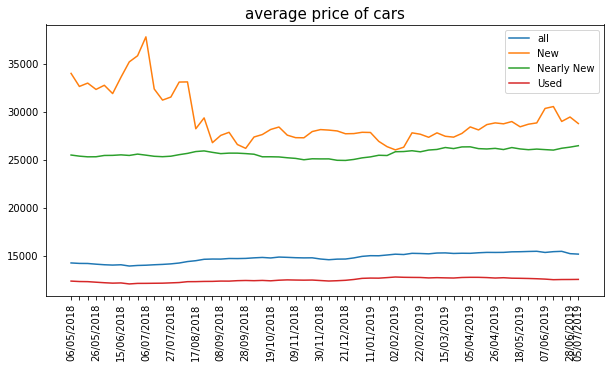

In [39]:
# plot 1 chart showing mean prices for all, new, nearly new and used

fig, ax = plt.subplots(figsize=(10,5))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = total_mean
y2 = new_mean
y3 = nearlyNew_mean
y4 = used_mean

ax.set_title('average price of cars', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
plt.legend(('all','New', 'Nearly New', 'Used'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
plt.show()

In [40]:
# lets see the total values of the cars on the site
# have to convert the price column to floats (i.e. get rid of the £ and commas)

price_sum = []
price_new_sum = []
price_nearlyNew_sum = []
price_used_sum = []


for i in range(len(files)):
    price_sum.append(df[i]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    price_new_sum.append(df[i][(df[i]['condition'] == 'New')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    price_nearlyNew_sum.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    price_used_sum.append(df[i][(df[i]['condition'] == 'Used')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())

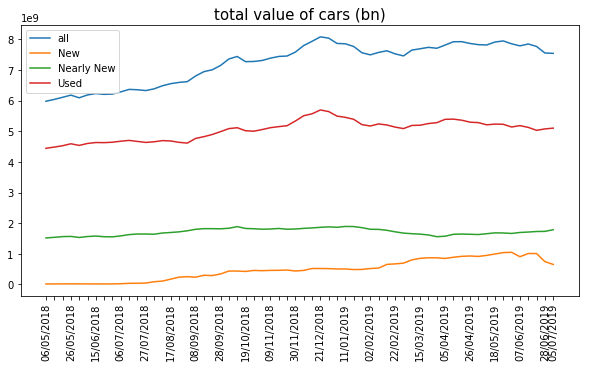

In [41]:
# plot 1 chart showing total value for all, new, nearly new and used

fig, ax = plt.subplots(figsize=(10,5))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = price_sum
y2 = price_new_sum
y3 = price_nearlyNew_sum
y4 = price_used_sum

ax.set_title('total value of cars (bn)', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
plt.legend(('all','New', 'Nearly New', 'Used'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
plt.show()

In [42]:
#exploring credit

In [43]:
total_credit_pct = []
new_credit_pct = []
nearlyNew_credit_pct = []
used_credit_pct = []

for i in range(len(files)):
    total_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull())]) / df[i]['condition'].count())
    new_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'New')]) / df[i][(df[i]['condition'] == 'New')]['condition'].count())    
    nearlyNew_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Nearly New')]) / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())    
    used_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Used')]) / df[i][(df[i]['condition'] == 'Used')]['condition'].count())    

df_summary['total credit %'] = total_credit_pct
df_summary['new credit %'] = new_credit_pct
df_summary['nearly new credit %'] = nearlyNew_credit_pct
df_summary['used credit %'] = used_credit_pct


In [44]:
df_summary.head()

,Date,Total Cars,New,Nearly New,Used,forecourts,hasVideo,totalImages,total credit %,new credit %,nearly new credit %,used credit %
0,06/05/2018,419905,505,59610,359790,12703,66068,7841570,0.641205,0.0,0.561651,0.655285
1,11/05/2018,425506,542,60671,364293,12736,67758,8028698,0.637883,0.0,0.561998,0.651470
2,19/05/2018,430633,572,61771,368290,12736,70423,8170129,0.635044,0.0,0.561768,0.648321
3,26/05/2018,437824,597,62012,375215,12778,71198,8326265,0.626295,0.0,0.548958,0.640073
4,01/06/2018,433471,580,60343,372548,12768,70863,8222972,0.625477,0.0,0.551862,0.638374


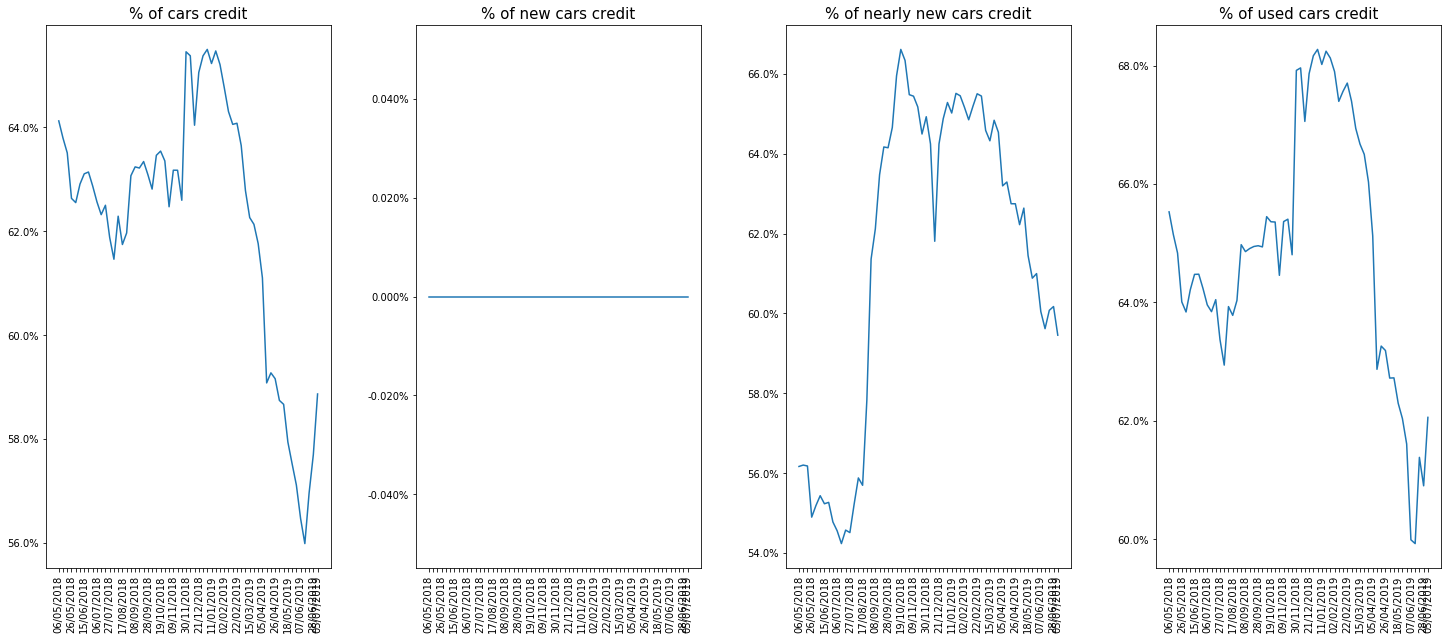

In [45]:
# plot 4 charts showing total credit by new / nearly new / used

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['total credit %']*100
ax[0].set_title('% of cars credit', fontsize=15)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].plot(x, y1)
#ax[0].legend(('Automatic', 'Manual'))
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter())
    
y2 = df_summary['new credit %']*100
ax[1].set_title('% of new cars credit', fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].plot(x, y2)
#ax[0].legend(('Automatic', 'Manual'))
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter())

y3 = df_summary['nearly new credit %']*100
ax[2].set_title('% of nearly new cars credit', fontsize=15)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].plot(x, y3)
#ax[0].legend(('Automatic', 'Manual'))
ax[2].yaxis.set_major_formatter(ticker.PercentFormatter())

y4 = df_summary['used credit %']*100
ax[3].set_title('% of used cars credit', fontsize=15)
ax[3].set_xticklabels(labels, rotation = 90)
ax[3].plot(x, y4)
#ax[0].legend(('Automatic', 'Manual'))
ax[3].yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - 4 charts on Credit by new nearly new used.png', bbox_inches = 'tight')

plt.show()

In [46]:
# explore the quotetype column
df[-1].quoteType.unique()

array([nan, 'HP', 'PCP'], dtype=object)

In [47]:
hp_pct = []
pcp_pct = []
new_hp_pct = []
new_pcp_pct = []
nearlyNew_hp_pct = []
nearlyNew_pcp_pct = []
used_hp_pct = []
used_pcp_pct = []

for i in range(len(files)):
    hp_pct.append(df[i][(df[i]['quoteType'] == 'HP')]['condition'].count() / df[i]['condition'].count())
    pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP')]['condition'].count() / df[i]['condition'].count())
    new_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    new_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    nearlyNew_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    nearlyNew_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    used_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())
    used_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())

df_summary['total HP %'] = hp_pct
df_summary['total PCP %'] = pcp_pct
df_summary['new HP %'] = new_hp_pct
df_summary['new PCP %'] = new_pcp_pct
df_summary['nearly new HP %'] = nearlyNew_hp_pct
df_summary['nearly new PCP %'] = nearlyNew_pcp_pct
df_summary['used HP %'] = used_hp_pct
df_summary['used PCP %'] = used_pcp_pct

In [48]:
df_summary.head()

,Date,Total Cars,New,Nearly New,Used,forecourts,hasVideo,totalImages,total credit %,new credit %,nearly new credit %,used credit %,total HP %,total PCP %,new HP %,new PCP %,nearly new HP %,nearly new PCP %,used HP %,used PCP %
0,06/05/2018,419905,505,59610,359790,12703,66068,7841570,0.641205,0.0,0.561651,0.655285,0.316564,0.324640,0.0,0.0,0.062557,0.499094,0.359093,0.296192
1,11/05/2018,425506,542,60671,364293,12736,67758,8028698,0.637883,0.0,0.561998,0.651470,0.314047,0.323836,0.0,0.0,0.060737,0.501261,0.356702,0.294768
2,19/05/2018,430633,572,61771,368290,12736,70423,8170129,0.635044,0.0,0.561768,0.648321,0.310945,0.324100,0.0,0.0,0.059170,0.502598,0.353656,0.294665
3,26/05/2018,437824,597,62012,375215,12778,71198,8326265,0.626295,0.0,0.548958,0.640073,0.307651,0.318644,0.0,0.0,0.058908,0.490050,0.349250,0.290823
4,01/06/2018,433471,580,60343,372548,12768,70863,8222972,0.625477,0.0,0.551862,0.638374,0.307495,0.317982,0.0,0.0,0.057969,0.493893,0.348390,0.289984


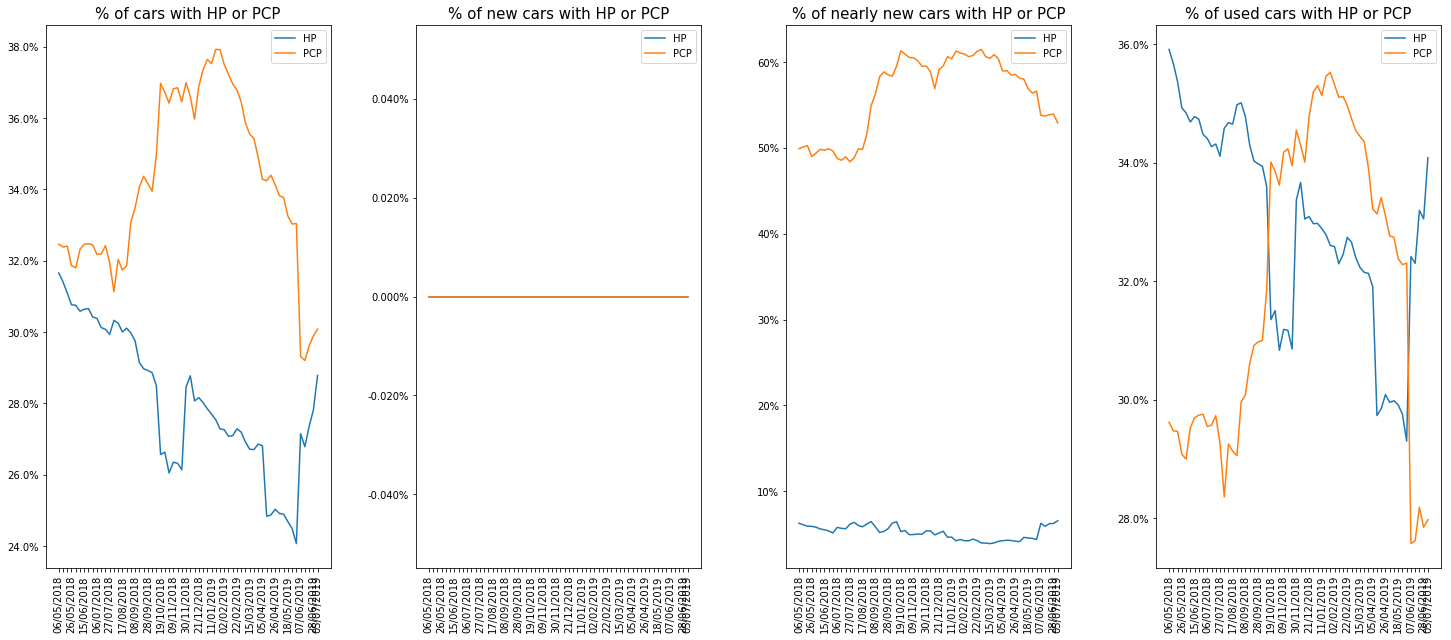

In [49]:
# plot 4 charts showing Hp & PCP by new / nearly new / used

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['total HP %']*100
y2 = df_summary['total PCP %']*100
ax[0].set_title('% of cars with HP or PCP', fontsize=15)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].plot(x, y1)
ax[0].plot(x, y2)
ax[0].legend(('HP', 'PCP'))
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter())

y3 = df_summary['new HP %']*100
y4 = df_summary['new PCP %']*100
ax[1].set_title('% of new cars with HP or PCP', fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].plot(x, y3)
ax[1].plot(x, y4)
ax[1].legend(('HP', 'PCP'))
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter())

y5 = df_summary['nearly new HP %']*100
y6 = df_summary['nearly new PCP %']*100
ax[2].set_title('% of nearly new cars with HP or PCP', fontsize=15)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].plot(x, y5)
ax[2].plot(x, y6)
ax[2].legend(('HP', 'PCP'))
ax[2].yaxis.set_major_formatter(ticker.PercentFormatter())

y7 = df_summary['used HP %']*100
y8 = df_summary['used PCP %']*100
ax[3].set_title('% of used cars with HP or PCP', fontsize=15)
ax[3].set_xticklabels(labels, rotation = 90)
ax[3].plot(x, y7)
ax[3].plot(x, y8)
ax[3].legend(('HP', 'PCP'))
ax[3].yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - 4 charts on Credit Type by new nearly new used.png', bbox_inches = 'tight')

plt.show()

In [50]:
#
# Exploring Pendragon data
#

In [51]:
pendragonVolume_New = []
pendragonVolume_NearlyNew = []
pendragonVolume_Used = []

for i in range(len(df)):
    pendragonVolume_New.append(df[i][df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False) & (df[i]['condition'] == 'New')]['name'].count())
    pendragonVolume_NearlyNew.append(df[i][df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    pendragonVolume_Used.append(df[i][df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False) & (df[i]['condition'] == 'Used')]['name'].count())
    
df_summary['Pendragon New'] = pendragonVolume_New
df_summary['Pendragon Nearly New'] = pendragonVolume_NearlyNew
df_summary['Pendragon Used'] = pendragonVolume_Used

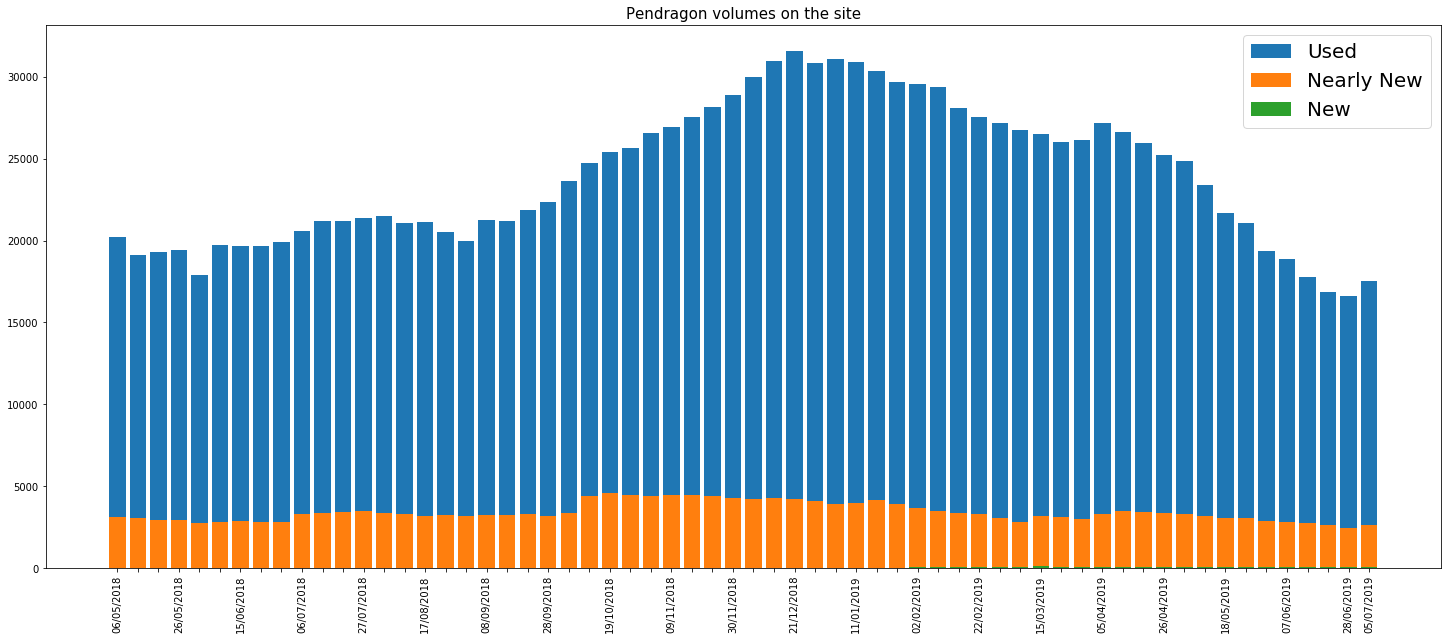

In [52]:
# plot 1 chart showing pendragon car listings

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['Pendragon New'] + df_summary['Pendragon Nearly New'] + df_summary['Pendragon Used']
y2 = df_summary['Pendragon New'] + df_summary['Pendragon Nearly New']
y3 = df_summary['Pendragon New']
ax.set_title('Pendragon volumes on the site', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.bar(x, y1, label = 'Used')
ax.bar(x, y2, label = 'Nearly New')
ax.bar(x, y3, label = 'New')
ax.legend(fontsize=20)

if savePNG == 1:
    plt.savefig('Auto Trader - pendragon volumes.png', bbox_inches = 'tight')

plt.show()

In [53]:
# calculuation the % of Pendragon sales each week
   
leave_pendragon_New = [0]
leave_pendragon_NearlyNew = [0]
leave_pendragon_Used = [0]

for i in range(1,len(df)):
    leave_pendragon_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_pendragon_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_pendragon_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

df_summary['Pendragon New gone'] = leave_pendragon_New
df_summary['Pendragon Nearly New gone'] = leave_pendragon_NearlyNew
df_summary['Pendragon Used gone'] = leave_pendragon_Used    

In [54]:
# pct_New = [0]
# pct_NearlyNew = [0]
# pct_Used = [0]

# for i in range(1,len(df)):
#     pct_New.append(leave_pendragon[i]/pendragonVolume[i-1])
    


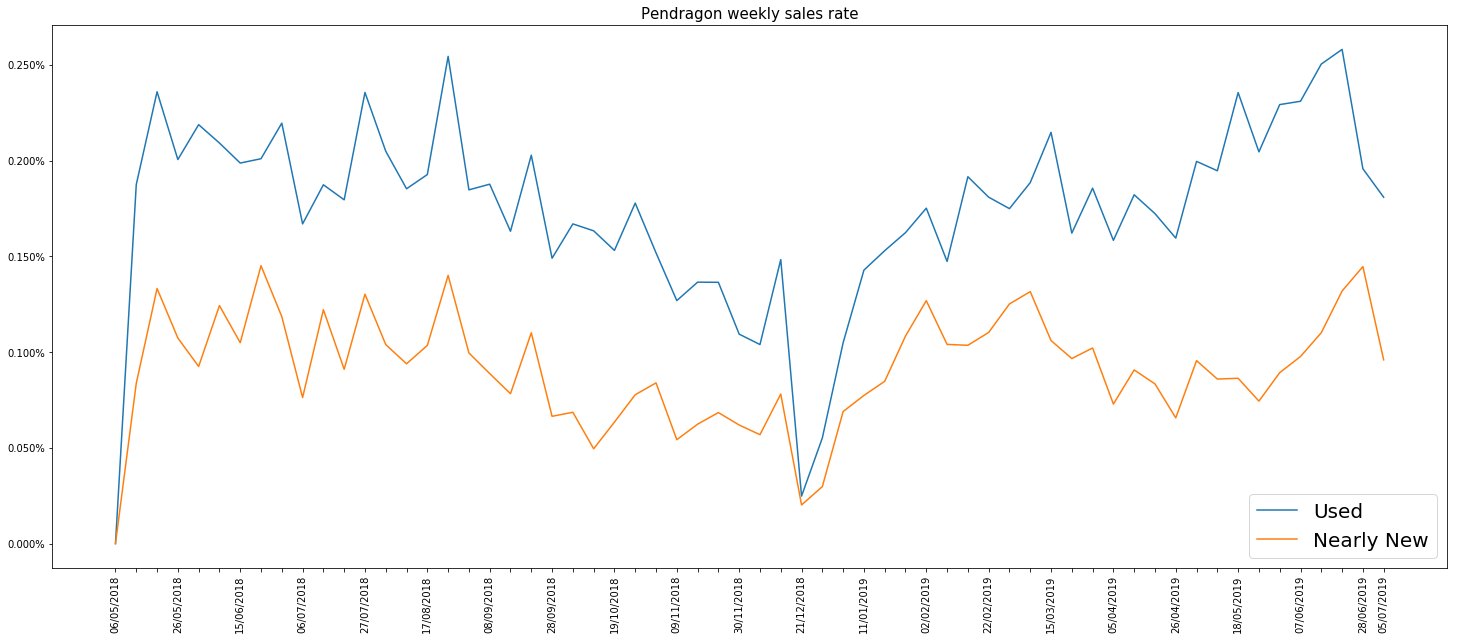

In [55]:
# plot 1 chart showing pendragon car listings

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['Pendragon Used gone'] / df_summary['Pendragon Used']
y2 = df_summary['Pendragon Nearly New gone'] / df_summary['Pendragon Nearly New']
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
ax.set_title('Pendragon weekly sales rate', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

if savePNG == 1:
    plt.savefig('Auto Trader - pendragon pct leaving.png', bbox_inches = 'tight')

plt.show()

In [56]:
#
# Exploring Lookers data
#

In [57]:
lookersVolume_New = []
lookersVolume_NearlyNew = []
lookersVolume_Used = []

for i in range(len(df)):
    lookersVolume_New.append(df[i][df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False) & (df[i]['condition'] == 'New')]['name'].count())
    lookersVolume_NearlyNew.append(df[i][df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    lookersVolume_Used.append(df[i][df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False) & (df[i]['condition'] == 'Used')]['name'].count())
    
df_summary['Lookers New'] = lookersVolume_New
df_summary['Lookers Nearly New'] = lookersVolume_NearlyNew
df_summary['Lookers Used'] = lookersVolume_Used

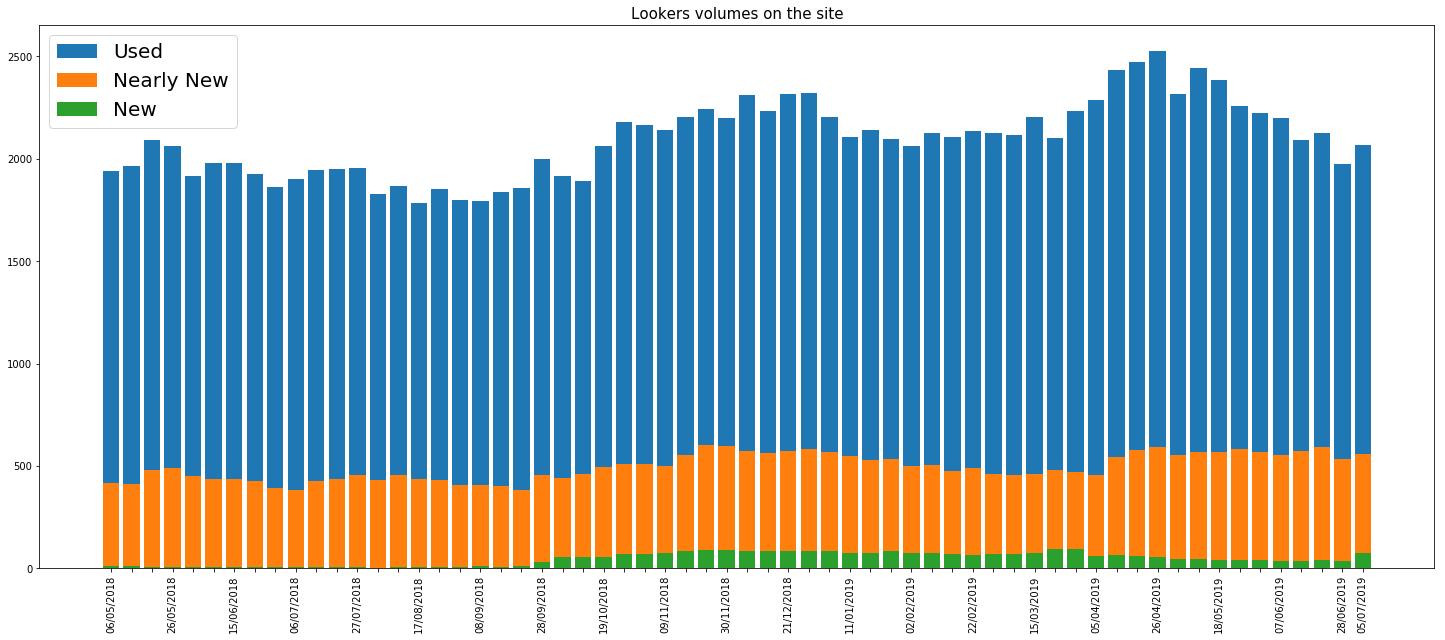

In [58]:
# plot 1 chart showing lookers car listings

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['Lookers New'] + df_summary['Lookers Nearly New'] + df_summary['Lookers Used']
y2 = df_summary['Lookers New'] + df_summary['Lookers Nearly New']
y3 = df_summary['Lookers New']
ax.set_title('Lookers volumes on the site', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.bar(x, y1, label = 'Used')
ax.bar(x, y2, label = 'Nearly New')
ax.bar(x, y3, label = 'New')
ax.legend(fontsize=20)

if savePNG == 1:
    plt.savefig('Auto Trader - Lookers volumes.png', bbox_inches = 'tight')

plt.show()

In [61]:
# calculuation the % of Pendragon sales each week
   
leave_lookers_New = [0]
leave_lookers_NearlyNew = [0]
leave_lookers_Used = [0]

for i in range(1,len(df)):
    leave_lookers_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_lookers_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_lookers_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

df_summary['Lookers New gone'] = leave_lookers_New
df_summary['Lookers Nearly New gone'] = leave_lookers_NearlyNew
df_summary['Lookers Used gone'] = leave_lookers_Used   

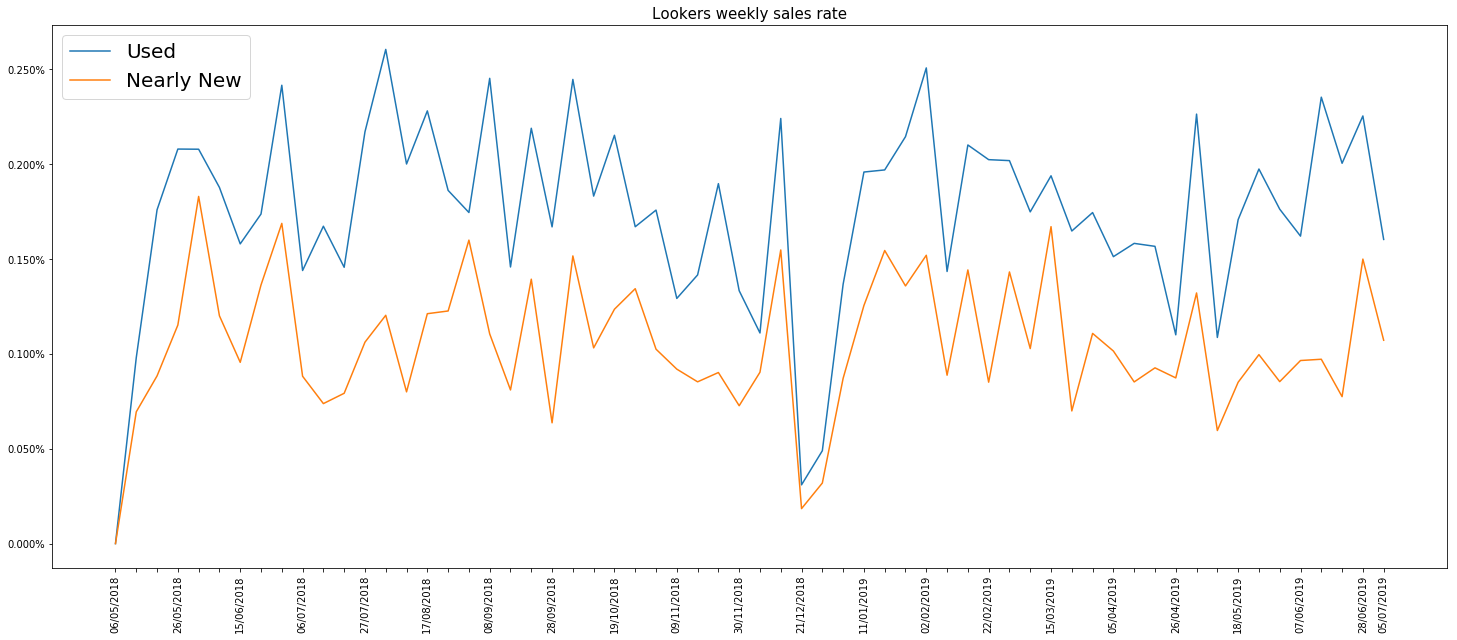

In [62]:
# plot 1 chart showing lookers car listings

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = df_summary['Lookers Used gone'] / df_summary['Lookers Used']
y2 = df_summary['Lookers Nearly New gone'] / df_summary['Lookers Nearly New']
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
ax.set_title('Lookers weekly sales rate', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

if savePNG == 1:
    plt.savefig('Auto Trader - Lookers pct leaving.png', bbox_inches = 'tight')

plt.show()

In [63]:
df[-1]['advert_type'].unique()

array(['STANDARD_ADVERT', 'ALLOCATED_STOCK'], dtype=object)

In [64]:
#explore the number of vehicles leaving the site

In [65]:
#see how many veh-ids change each month
stay = [0] #assign 0 to the first data point - we dont have the prior week's data!
leave = [0] #assign 0 to the first data point - we dont have the prior week's data!
for i in range(1,len(files)):
    leave.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]))
    stay.append(len(df[i-1][df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]))


In [66]:
# add new columns to the dataframe of number of cars gone and % gone
   
leave = [0]
leave_value = [0]
leave_pct = [0]
leave_new = [0]
leave_new_value = [0]
leave_new_pct = [0]
leave_nearlynew = [0]
leave_nearlynew_value = [0]
leave_nearlynew_pct = [0]
leave_used = [0]
leave_used_value = [0]
leave_used_pct = [0]

for i in range(1,len(files)):
    leave.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]))
    leave_value.append(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    leave_pct.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]) / df[i-1]['condition'].count())
    leave_new.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'])
    leave_new_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'New')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    leave_new_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'] / df[i-1]['condition'].value_counts()['New'])
    leave_nearlynew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'])
    leave_nearlynew_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Nearly New')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    leave_nearlynew_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'] / df[i-1]['condition'].value_counts()['Nearly New'])
    leave_used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'])
    leave_used_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Used')]['price'].replace('[\£,]', '', regex=True).astype(float).sum())
    leave_used_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'] / df[i-1]['condition'].value_counts()['Used'])


In [67]:
df_summary['total gone'] = leave
df_summary['total value gone'] = leave_value
df_summary['% total gone'] = leave_pct
df_summary['new gone'] = leave_new
df_summary['new value gone'] = leave_new_value
df_summary['% new gone'] = leave_new_pct
df_summary['nearly new gone'] = leave_nearlynew
df_summary['nearly new value gone'] = leave_nearlynew_value
df_summary['% nearly newgone'] = leave_nearlynew_pct
df_summary['used gone'] = leave_used
df_summary['used value gone'] = leave_used_value
df_summary['% used gone'] = leave_used_pct


In [68]:
df_summary.head()

,Date,Total Cars,New,Nearly New,Used,forecourts,hasVideo,totalImages,total credit %,new credit %,nearly new credit %,used credit %,total HP %,total PCP %,new HP %,new PCP %,nearly new HP %,nearly new PCP %,used HP %,used PCP %,Pendragon New,Pendragon Nearly New,Pendragon Used,Pendragon New gone,Pendragon Nearly New gone,Pendragon Used gone,Lookers New,Lookers Nearly New,Lookers Used,lookers New gone,lookers Nearly New gone,lookers Used gone,Lookers New gone,Lookers Nearly New gone,Lookers Used gone,total gone,total value gone,% total gone,new gone,new value gone,% new gone,nearly new gone,nearly new value gone,% nearly newgone,used gone,used value gone,% used gone
0,06/05/2018,419905,505,59610,359790,12703,66068,7841570,0.641205,0.0,0.561651,0.655285,0.316564,0.324640,0.0,0.0,0.062557,0.499094,0.359093,0.296192,1,3116,17101,0,0,0,9,407,1526,0,0,0,0,0,0,0,0.000000e+00,0.000000,0,0.0,0.000000,0,0.0,0.000000,0,0.0,0.000000
1,11/05/2018,425506,542,60671,364293,12736,67758,8028698,0.637883,0.0,0.561998,0.651470,0.314047,0.323836,0.0,0.0,0.060737,0.501261,0.356702,0.294768,1,3057,16050,0,256,3010,9,403,1550,0,28,152,0,28,152,56388,6.929439e+08,0.134288,27,868207.0,0.053465,5791,138847562.0,0.097148,50570,553228084.0,0.140554
2,19/05/2018,430633,572,61771,368290,12736,70423,8170129,0.635044,0.0,0.561768,0.648321,0.310945,0.324100,0.0,0.0,0.059170,0.502598,0.353656,0.294665,1,2950,16356,0,393,3860,6,475,1608,2,42,283,2,42,283,82382,1.013695e+09,0.193609,55,1788235.0,0.101476,8360,200019842.0,0.137792,73967,811887052.0,0.203043
3,26/05/2018,437824,597,62012,375215,12778,71198,8326265,0.626295,0.0,0.548958,0.640073,0.307651,0.318644,0.0,0.0,0.058908,0.490050,0.349250,0.290823,0,2943,16471,1,316,3304,6,486,1572,0,56,327,0,56,327,72521,9.131382e+08,0.168406,43,1765250.0,0.075175,8141,199116304.0,0.131793,64337,712256684.0,0.174691
4,01/06/2018,433471,580,60343,372548,12768,70863,8222972,0.625477,0.0,0.551862,0.638374,0.307495,0.317982,0.0,0.0,0.057969,0.493893,0.348390,0.289984,0,2778,15109,0,257,3306,5,448,1462,1,82,304,1,82,304,62052,7.585491e+08,0.141728,49,1353988.0,0.082077,6499,151654627.0,0.104802,55504,605540484.0,0.147926


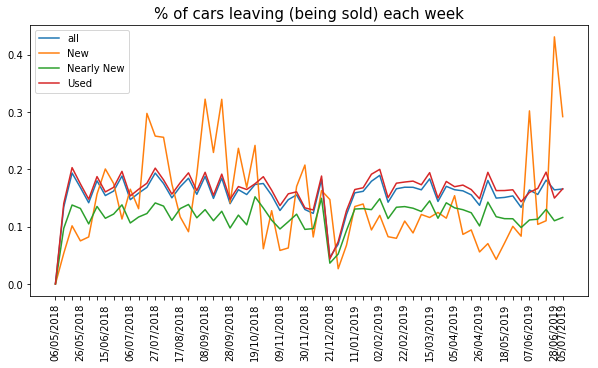

In [69]:
# plot 1 chart showing % of cars leaving (being sold)

fig, ax = plt.subplots(figsize=(10,5))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = leave_pct
y2 = leave_new_pct
y3 = leave_nearlynew_pct
y4 = leave_used_pct

ax.set_title('% of cars leaving (being sold) each week', fontsize=15)
ax.set_xticklabels(labels, rotation = 90)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
plt.legend(('all','New', 'Nearly New', 'Used'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - % of cars gone each week by condition.png', bbox_inches = 'tight')
    
plt.show()

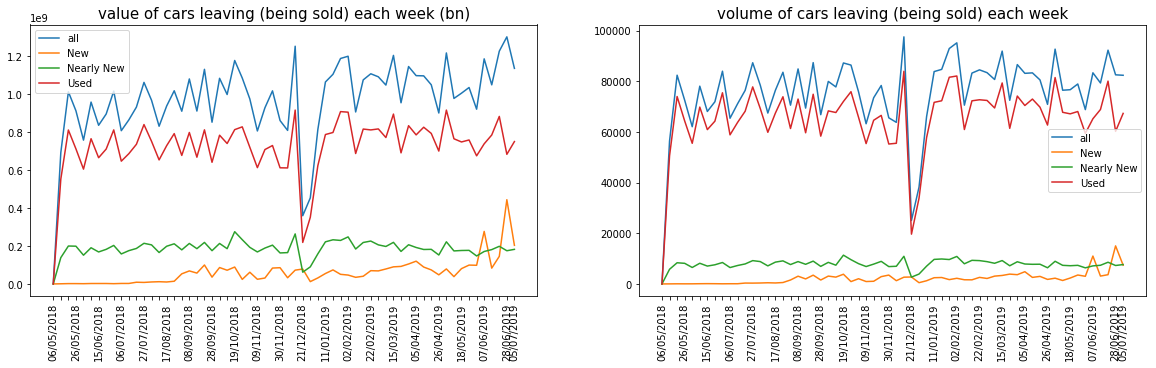

In [70]:
# plot 2 chart showing value and volume of cars leaving (being sold)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary['Date']

labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

y1 = leave_value
y2 = leave_new_value
y3 = leave_nearlynew_value
y4 = leave_used_value

ax[0].set_title('value of cars leaving (being sold) each week (bn)', fontsize=15)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].plot(x, y1)
ax[0].plot(x, y2)
ax[0].plot(x, y3)
ax[0].plot(x, y4)
ax[0].legend(('all','New', 'Nearly New', 'Used'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

y5 = leave
y6 = leave_new
y7 = leave_nearlynew
y8 = leave_used

ax[1].set_title('volume of cars leaving (being sold) each week', fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].plot(x, y5)
ax[1].plot(x, y6)
ax[1].plot(x, y7)
ax[1].plot(x, y8)
ax[1].legend(('all','New', 'Nearly New', 'Used'))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter())

if savePNG == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
plt.show()

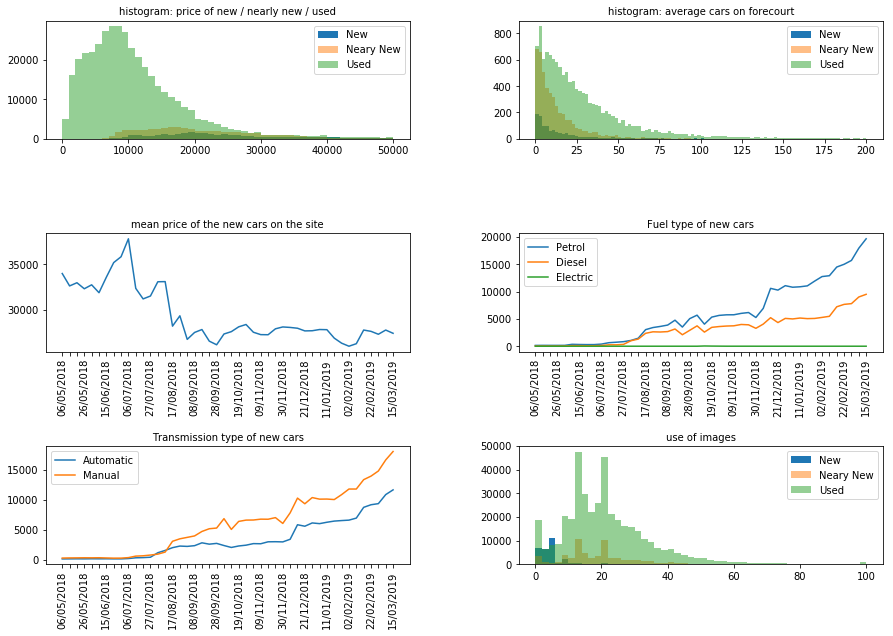

In [48]:
# plot 6 charts of number of dealers and number of cars with videos / images, and the % of all dealers and all videos / images

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

plt.subplots_adjust(hspace=0.8, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

# omit 2 out of 3 labels to declutter the x-axis
labels = list(df_summary['Date'])
for i in range(2,len(labels),3):
    labels[i]=''
    labels[i-1]=''

    
p1 = df[-1][(df[-1]['condition'] == 'New')]['price'].replace('[\£,]', '', regex=True).astype(int)
p2 = df[-1][(df[-1]['condition'] == 'Nearly New')]['price'].replace('[\£,]', '', regex=True).astype(int)
p3 = df[-1][(df[-1]['condition'] == 'Used')]['price'].replace('[\£,]', '', regex=True).astype(int)

ax[0,0].hist(p1, bins=50, range=[0, 50000], histtype='stepfilled', label='New')
ax[0,0].hist(p2, bins=50, range=[0, 50000], histtype='stepfilled', alpha = 0.5, label='Neary New')
ax[0,0].hist(p3, bins=50, range=[0, 50000], histtype='stepfilled', alpha = 0.5, label='Used')
ax[0,0].set_title('histogram: price of new / nearly new / used', fontsize=10)
ax[0,0].legend()

c1 = df[-1][(df[-1]['condition'] == 'New')].groupby(['name'])['name'].count()
c2 = df[-1][(df[-1]['condition'] == 'Nearly New')].groupby(['name'])['name'].count()
c3 = df[-1][(df[-1]['condition'] == 'Used')].groupby(['name'])['name'].count()

ax[0,1].hist(c1, bins=100, range=[0, 200], histtype='stepfilled', label='New')
ax[0,1].hist(c2, bins=100, range=[0, 200], histtype='stepfilled', alpha = 0.5, label='Neary New')
ax[0,1].hist(c3, bins=100, range=[0, 200], histtype='stepfilled', alpha = 0.5, label='Used')
ax[0,1].set_title('histogram: average cars on forecourt', fontsize=10)
ax[0,1].legend()

m1 = new_mean
ax[1,0].set_title('mean price of the new cars on the site', fontsize=10)
ax[1,0].set_xticklabels(labels, rotation = 90)
ax[1,0].plot(x, m1)

f1 = new_fuelPetrol
f2 = new_fuelDiesel
f3 = new_fuelElectric

ax[1,1].set_title('Fuel type of new cars', fontsize=10)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].plot(x, f1)
ax[1,1].plot(x, f2)
ax[1,1].plot(x, f3)
ax[1,1].legend(('Petrol', 'Diesel', 'Electric'))


t1 = new_automatic
t2 = new_manual

ax[2,0].set_title('Transmission type of new cars', fontsize=10)
ax[2,0].set_xticklabels(labels, rotation = 90)
ax[2,0].plot(x, t1)
ax[2,0].plot(x, t2)
ax[2,0].legend(('Automatic', 'Manual'))


i1 = df[-1][(df[-1]['condition'] == 'New')]['totalImages']
i2 = df[-1][(df[-1]['condition'] == 'Nearly New')]['totalImages']
i3 = df[-1][(df[-1]['condition'] == 'Used')]['totalImages']

ax[2,1].hist(i1, bins=50, histtype='stepfilled', label='New')
ax[2,1].hist(i2, bins=50, histtype='stepfilled', alpha = 0.5,label='Neary New')
ax[2,1].hist(i3, bins=50, histtype='stepfilled', alpha = 0.5,label='Used')
ax[2,1].set_title('use of images', fontsize=10)
ax[2,1].legend()

plt.show()

In [ ]:
# explore the PCP on New etc
a=-1
len(df[a][(df[a].totalCredit.notnull()) & (df[a].fuel == 'Petrol')])/df[a]['condition'].count()

#representativeApr

In [ ]:
df[-1].head(20)

In [ ]:
# check duration of all credit
df[-1].duration.unique()

# seems to all be 36 months

In [ ]:
# explore the hasVideo column
df[-1].hasVideo.unique()

In [ ]:
df[-1]['hasVideo'].value_counts()[True]

In [ ]:
# lets see the total values of the cars on the site, and the mean
# have to convert the price column to floats (i.e. get rid of the £ and commas)
#see how many veh-ids change each month
hasVideo = []
hasVideo_pct = []
for i in range(len(files)):
    hasVideo.append(df[i]['hasVideo'].value_counts()[True])
    hasVideo_pct.append(df[i]['hasVideo'].value_counts()[True] / df[i].condition.count())

In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'has Video': hasVideo,
       '% has Video': hasVideo_pct}

df_to_add = pd.DataFrame(data, columns=['has Video','% has Video'])

In [ ]:
df_to_add

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
# plot bar charts for has Video and % has Video; with Date as the x-axis
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']


plt.subplot(3,3,1)
plt.title(df_summary['has Video'].name, fontsize=10)
x_ticks=[1,2,3] # not sure why this works
plt.xticks(x_ticks,rotation=90)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.bar(x,df_summary['has Video'])

#plt.subplot(3,3,2)
#plt.title(df_summary['% has Video'].name, fontsize=10)
#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.line(x,df_summary['% has Video'])

plt.subplot(3,3,2)
plt.title(df_summary['% has Video'].name, fontsize=10)
plt.xticks(df_summary.index,x)
ax2= df_summary['% has Video'].plot(kind='line')
#plt.legend()
plt.xticks(rotation='vertical')

In [ ]:
#explore miles data
df[-1].miles.unique()


In [ ]:
df[-1]['miles'].replace({',':''},regex=True).apply(pd.to_numeric).hist(range=[0,150000],bins=30)

In [ ]:
df[-1]['miles'].replace({',':''},regex=True).apply(pd.to_numeric).hist(range=[0,30000],bins=30)

In [ ]:
df[-1]['miles'].replace({',':''},regex=True).apply(pd.to_numeric).hist(range=[0,30],bins=30)

In [ ]:
fig = plt.subplots(int(len(files)/8)+1, 8)
plt.subplots_adjust(hspace=0.6, wspace=0.6)


for i in range(len(files)-1):
    plt.subplot(int(len(files)/8)+1, 8, i+1)
    plt.title(df_summary.iloc[i]['Date'], fontsize=10)
    df[i][(df[i].condition != "New")]['miles'].replace({',':''},regex=True).apply(pd.to_numeric).hist(range=[0,100000],bins=50,figsize=(15,10))
    

In [ ]:
#explore totalImages data
df[-1].totalImages.unique()

In [ ]:
df[-1]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,10))

In [ ]:
fig = plt.subplots(int(len(files)/8)+1, 8)
plt.subplots_adjust(hspace=0.6, wspace=0.6)


for i in range(len(files)-1):
#for i in range(1):
    plt.subplot(int(len(files)/8)+1, 8, i+1)
    plt.title(df_summary.iloc[i]['Date'], fontsize=10)
    df[i]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,10))

In [ ]:
#fig = plt.subplots(1, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list = ['New','Nearly New','Used']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(plot_list[i], fontsize=10)
    #df[i]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,10))
    df[-1][(df[-1].condition == plot_list[i])]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,5))

In [ ]:
df[-1].columns

In [ ]:
#explore representativeApr data
df[-1].representativeApr.unique()

In [ ]:
df[-1]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,10))

In [ ]:
fig = plt.subplots(int(len(files)/8)+1, 8)
plt.subplots_adjust(hspace=0.6, wspace=0.6)


for i in range(len(files)-1):
#for i in range(1):
    plt.subplot(int(len(files)/8)+1, 8, i+1)
    plt.title(df_summary.iloc[i]['Date'], fontsize=10)
    df[i]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,10))

In [ ]:
#fig = plt.subplots(1, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list = ['New','Nearly New','Used']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(plot_list[i], fontsize=10)
    #df[i]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,10))
    df[-1][(df[-1].condition == plot_list[i])]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,5))

In [ ]:
#fig = plt.subplots(1, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list = ['HP','PCP']

for i in range(2):
    plt.subplot(1, 3, i+1)
    plt.title(plot_list[i], fontsize=10)
    #df[i]['totalImages'].hist(range=[0,100],bins=100,figsize=(15,10))
    df[-1][(df[-1].quoteType == plot_list[i]) & (df[-1].condition == 'Used')]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,5))


In [ ]:
#fig = plt.subplots(1, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list = ['Petrol','Diesel','Electric']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(plot_list[i], fontsize=10)
    df[-1][(df[-1].fuel == plot_list[i]) & (df[-1].quoteType == 'HP') & (df[-1].condition == 'Used')]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,5))


In [ ]:
df[-1].fuel.unique()

In [ ]:
#fig = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list_1 = ['Petrol','Diesel','Electric']
plot_list_2 = [0,25,50,100,200,100000]


for i in range(5):
    for ii in range(3):        
        plt.subplot(3, 5, ii*5 + i+1)
        plt.title((plot_list[ii], plot_list_2[i], plot_list_2[i+1]), fontsize=10)
        df[-1][(df[-1].cars > plot_list_2[i]) & (df[-1].cars <= plot_list_2[i+1])& (df[-1].fuel == plot_list_1[ii]) & (df[-1].quoteType == 'HP') & (df[-1].condition == 'Used')]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,5))


In [ ]:
#plt.title(plot_list[ii], fontsize=10)
df[-1][(df[-1].cars > 0) & (df[-1].cars <= 25)& (df[-1].fuel == 'Petrol') & (df[-1].quoteType == 'HP') & (df[-1].condition == 'Used')]['representativeApr'].hist(range=[0,25],bins=25,figsize=(15,5))

In [ ]:
# lets see if there is any difference between petrol and diesel if split by forecourt size
#fig = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plot_list_1= ['Petrol','Diesel','Electric']
plot_list_2= ['New','Nearly New','Used']

for i in range(3):
    for ii in range(3):
        plt.subplot(3, 3, ii*3 + i+1)
        plt.title((plot_list_1[ii] , plot_list_2[i]), fontsize=10)
        df[-1][(df[-1].fuel == plot_list_1[ii]) & (df[-1].condition == plot_list_2[i])]['cars'].hist(range=[0,200],bins=50,figsize=(15,5))


In [ ]:
df_summary

In [ ]:
df[-1].columns


In [ ]:
# exploring the size of forecourts
df[-1].cars.value_counts()

In [ ]:
plt.title('forecourts sorted by number of cars', fontsize=10)
#fig = plt.subplots(2, 2)
plt.subplot(2, 2, 1)
df[-1]['cars'].hist(range=[0,3000],bins=600,figsize=(15,10))
plt.subplot(2, 2, 2)
df[-1]['cars'].hist(range=[0,200],bins=200,figsize=(15,10))



In [ ]:
df[-1].cars.max()

In [ ]:
# plot bar chart for number of cars in each forecourt bin; with Date as the x-axis
fig = plt.figure(figsize=(15,10))
#fig.subplots_adjust(hspace=0.6, wspace=0.3)
plt.title('number of cars in total on forecourts of x to x-5 (bins) cars', fontsize=10)

x = list(range(0,250,5))

for i in range(0,250,5):
    #plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.bar(x[int(i/5)],df[-1][(df[-1].cars > i) & (df[-1].cars <= ((i+5)))].cars.count(), color = 'blue')

    
    
    
    #    plt.subplot(3,3,i+1)
#    plt.title(df_summary.columns[i+8], fontsize=10)
#    x_ticks=[1,2,3] # not sure why this works
#    plt.xticks(x_ticks,rotation=90)
#    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#    plt.bar(x,df_summary[df_summary.columns[i+8]])

In [ ]:
# plot bar chart for number of cars in each forecourt bin, cumsum; with Date as the x-axis
#create a list of bins

largestForecourt = df[-1].cars.max()

cars_bins = []
for i in range(0,int(largestForecourt/5)+1):
    cars_bins.append(df[-1][(df[-1].cars > i*5) & (df[-1].cars <= (i*5)+5)].cars.count())

    
cars_bins_cumsum = []
forecourtSize = []
cars_bins_cumsum.append((cars_bins[0]))
forecourtSize.append(5)
for i in range(1,len(cars_bins)):
    cars_bins_cumsum.append(cars_bins_cumsum[i-1] + cars_bins[i])
    forecourtSize.append((i+1)*5)

forecourtSize = [str(x) for x in forecourtSize]
    
# and create the dataframe
data = {'xaxis': forecourtSize,
        'yaxis': cars_bins_cumsum}

df_cumsum_chartData = pd.DataFrame(data, columns=['xaxis','yaxis'])


In [ ]:
df_cumsum_chartData.set_index('xaxis',inplace=True)

In [ ]:
fig = plt.figure(figsize=(15,10))

#plt.subplot(2,1,1)
plt.title("cumulative number of cars on the site by forecourt size", fontsize=10)
#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.set_xlabel("x-axis")
plt.bar(df_cumsum_chartData.index,df_cumsum_chartData['yaxis'])
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.xticks(df_cumsum_chartData.index, x_labels, rotation='vertical')

plt.show()

In [ ]:
# plot bar chart for number of cars in each forecourt bin, cumsum; with Date as the x-axis
#create a list of bins

largestForecourt = df[-1].cars.max()

cars_bins = []
for i in range(0,int(40)):
    cars_bins.append(df[-1][(df[-1].cars > i*5) & (df[-1].cars <= (i*5)+5)].cars.count())

    
cars_bins_cumsum = []
forecourtSize = []
cars_bins_cumsum.append((cars_bins[0]))
forecourtSize.append(5)
for i in range(1,len(cars_bins)):
    cars_bins_cumsum.append(cars_bins_cumsum[i-1] + cars_bins[i])
    forecourtSize.append((i+1)*5)

forecourtSize = [str(x) for x in forecourtSize]
    
# and create the dataframe
data = {'xaxis': forecourtSize,
        'yaxis': cars_bins_cumsum}

df_cumsum_chartData1 = pd.DataFrame(data, columns=['xaxis','yaxis'])


In [ ]:
df_cumsum_chartData1.set_index('xaxis',inplace=True)


In [ ]:
fig = plt.figure(figsize=(15,10))

#plt.subplot(2,1,1)
plt.title("cumulative number of cars on the site by forecourt size", fontsize=10)
#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.set_xlabel("x-axis")
plt.bar(df_cumsum_chartData1.index,df_cumsum_chartData1['yaxis'])
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.xticks(df_cumsum_chartData.index, x_labels, rotation='vertical')

plt.show()

In [ ]:
df_summary.head()

In [ ]:
leave_PCP = [0]
leave_PCP_pct = [0]
leave_HP = [0]
leave_HP_pct = [0]
leave_hasVideo = [0]
leave_hasVideo_pct = [0]
leave_petrol = [0]
leave_petrol_pct = [0]
leave_diesel = [0]
leave_diesel_pct = [0]
leave_electric = [0]
leave_electric_pct = [0]

for i in range(1,len(files)):
    leave_PCP.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].quoteType.value_counts()['PCP'])
    leave_PCP_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].quoteType.value_counts()['PCP'] / df[i-1].quoteType.value_counts()['PCP'])
    leave_HP.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].quoteType.value_counts()['HP'])
    leave_HP_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].quoteType.value_counts()['HP'] / df[i-1].quoteType.value_counts()['HP'])
    leave_hasVideo.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].hasVideo.value_counts()[True])
    leave_hasVideo_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].hasVideo.value_counts()[True] / df[i-1].hasVideo.value_counts()[True])
    leave_petrol.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Petrol'])
    leave_petrol_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Petrol'] / df[i-1].fuel.value_counts()['Petrol'])
    leave_diesel.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Diesel'])
    leave_diesel_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Diesel'] / df[i-1].fuel.value_counts()['Diesel'])
    #leave_electric.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Electric'])
    #leave_electric_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values))].fuel.value_counts()['Electric'] / df[i-1].fuel.value_counts()['Electric'])

    
    
    
    

In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'leave PCP': leave_PCP,
        '% leave PCP': leave_PCP_pct,
        'leave HP': leave_HP,
        '% leave HP': leave_HP_pct,
        'leave hasVideo': leave_hasVideo,
        '% leave hasVideo': leave_hasVideo_pct,
        'leave Petrol': leave_petrol,
        '% leave Petrol': leave_petrol_pct,
        'leave Diesel': leave_diesel,
        '% leave Diesel': leave_diesel_pct}

df_to_add = pd.DataFrame(data, columns=['leave PCP','% leave PCP','leave HP','% leave HP',
                                       'leave hasVideo','% leave hasVideo','leave Petrol','% leave Petrol',
                                       'leave Diesel','% leave Diesel'])


In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']


plt.subplot(3,1,1)
plt.title('% of cars total cars sold and those with HP or PCP')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax4= df_summary['% leave PCP'].plot(kind='line')
ax5= df_summary['% leave HP'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')

plt.subplot(3,1,2)
plt.title('% of cars total cars sold and those with a video')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax6= df_summary['% leave hasVideo'].plot(kind='line')



plt.legend()
plt.xticks(rotation='vertical')

plt.subplot(3,1,3)
plt.title('% of cars total cars sold and those with Petrol or Diesel')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax7= df_summary['% leave Petrol'].plot(kind='line')
ax8= df_summary['% leave Diesel'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')


#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [ ]:
leave_images0 = [0]
leave_images0_pct = [0]
leave_images5 = [0]
leave_images5_pct = [0]
leave_images10 = [0]
leave_images10_pct = [0]
leave_images20 = [0]
leave_images20_pct = [0]
leave_images100 = [0]
leave_images100_pct = [0]
for i in range(1,len(files)):
    leave_images0.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages == 0)].veh_id.count())
    leave_images0_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages == 0)].veh_id.count() / df[i-1][(df[i-1].totalImages == 0)].veh_id.count())
    leave_images5.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 0) & (df[i-1].totalImages <= 5)].veh_id.count())
    leave_images5_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 0) & (df[i-1].totalImages <= 5)].veh_id.count() / df[i-1][(df[i-1].totalImages > 0) & (df[i-1].totalImages <= 5)].veh_id.count())
    leave_images10.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 5) & (df[i-1].totalImages <= 10)].veh_id.count())
    leave_images10_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 5) & (df[i-1].totalImages <= 10)].veh_id.count() / df[i-1][(df[i-1].totalImages > 5) & (df[i-1].totalImages <= 10)].veh_id.count())
    leave_images20.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 10) & (df[i-1].totalImages <= 20)].veh_id.count())
    leave_images20_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 10) & (df[i-1].totalImages <= 20)].veh_id.count() / df[i-1][(df[i-1].totalImages > 10) & (df[i-1].totalImages <= 20)].veh_id.count())
    leave_images100.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 20)].veh_id.count())
    leave_images100_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].totalImages > 20)].veh_id.count() / df[i-1][(df[i-1].totalImages > 20)].veh_id.count())

In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'leave_images0':leave_images0,
        'leave_images0_pct':leave_images0_pct,
        'leave_images5':leave_images5,
        'leave_images5_pct':leave_images5_pct,
        'leave_images10':leave_images10,
        'leave_images10_pct':leave_images10_pct,
        'leave_images20':leave_images20,
        'leave_images20_pct':leave_images20_pct,
        'leave_images100':leave_images100,
        'leave_images100_pct':leave_images100_pct}

df_to_add = pd.DataFrame(data, columns=['leave_images0','leave_images0_pct','leave_images5','leave_images5_pct',
                                       'leave_images10','leave_images10_pct','leave_images20','leave_images20_pct',
                                       'leave_images100','leave_images100_pct'])

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']


plt.subplot(3,1,1)
plt.title('% of cars total cars sold and by number of images: 0 images and between 0 and 5')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax2= df_summary['leave_images0_pct'].plot(kind='line')
ax3= df_summary['leave_images5_pct'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(3,1,2)
plt.title('% of cars total cars sold and by number of images: between 5 and 10, and between 10 and 20')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax4= df_summary['leave_images10_pct'].plot(kind='line')
ax5= df_summary['leave_images20_pct'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(3,1,3)
plt.title('% of cars total cars sold and by number of images: over 20')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax6= df_summary['leave_images100_pct'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')


#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [ ]:
leave_cars5 = [0]
leave_cars5_pct = [0]
leave_cars10 = [0]
leave_cars10_pct = [0]
leave_cars25 = [0]
leave_cars25_pct = [0]
leave_cars50 = [0]
leave_cars50_pct = [0]
leave_cars100 = [0]
leave_cars100_pct = [0]
leave_cars200 = [0]
leave_cars200_pct = [0]
leave_cars10000 = [0]
leave_cars10000_pct = [0]
for i in range(1,len(files)):
    leave_cars5.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 0) & (df[i-1].cars <= 5)].veh_id.count())
    leave_cars5_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 0) & (df[i-1].cars <= 5)].veh_id.count() / df[i-1][(df[i-1].cars > 0) & (df[i-1].cars <= 5)].veh_id.count())
    leave_cars10.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 5) & (df[i-1].cars <= 10)].veh_id.count())
    leave_cars10_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 5) & (df[i-1].cars <= 10)].veh_id.count() / df[i-1][(df[i-1].cars > 5) & (df[i-1].cars <= 10)].veh_id.count())
    leave_cars25.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 10) & (df[i-1].cars <= 25)].veh_id.count())
    leave_cars25_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 10) & (df[i-1].cars <= 25)].veh_id.count() / df[i-1][(df[i-1].cars > 10) & (df[i-1].cars <= 25)].veh_id.count())
    leave_cars50.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 25) & (df[i-1].cars <= 50)].veh_id.count())
    leave_cars50_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 25) & (df[i-1].cars <= 50)].veh_id.count() / df[i-1][(df[i-1].cars > 25) & (df[i-1].cars <= 50)].veh_id.count())
    leave_cars100.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 50) & (df[i-1].cars <= 100)].veh_id.count())
    leave_cars100_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 50) & (df[i-1].cars <= 100)].veh_id.count() / df[i-1][(df[i-1].cars > 50) & (df[i-1].cars <= 100)].veh_id.count())
    leave_cars200.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 100) & (df[i-1].cars <= 200)].veh_id.count())
    leave_cars200_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 100) & (df[i-1].cars <= 200)].veh_id.count() / df[i-1][(df[i-1].cars > 100) & (df[i-1].cars <= 200)].veh_id.count())
    leave_cars10000.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 200)].veh_id.count())
    leave_cars10000_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].cars > 200)].veh_id.count() / df[i-1][(df[i-1].cars > 200)].veh_id.count())

In [ ]:
df[i-1][(df[i-1].cars > 200)].veh_id.count()

In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'leave_cars5':leave_cars5,
        'leave_cars5_pct':leave_cars5_pct,
        'leave_cars10':leave_cars10,
        'leave_cars10_pct':leave_cars10_pct,
        'leave_cars25':leave_cars25,
        'leave_cars25_pct':leave_cars25_pct,
        'leave_cars50':leave_cars50,
        'leave_cars50_pct':leave_cars50_pct,
        'leave_cars100':leave_cars100,
        'leave_cars100_pct':leave_cars100_pct,
        'leave_cars200':leave_cars200,
        'leave_cars200_pct':leave_cars200_pct,
        'leave_cars10000':leave_cars10000,
        'leave_cars10000_pct':leave_cars10000_pct}

df_to_add = pd.DataFrame(data, columns=['leave_cars5','leave_cars5_pct','leave_cars10','leave_cars10_pct',
                                       'leave_cars25','leave_cars25_pct','leave_cars50','leave_cars50_pct',
                                       'leave_cars100','leave_cars100_pct','leave_cars200','leave_cars200_pct',
                                        'leave_cars10000','leave_cars10000_pct'])

In [ ]:
df_to_add

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']


plt.subplot(4,1,1)
plt.title('% of cars total cars sold and by size of forecourt: 0-5 and 6-10')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax2= df_summary['leave_cars5_pct'].plot(kind='line')
ax3= df_summary['leave_cars10_pct'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(4,1,2)
plt.title('% of cars total cars sold and by size of forecourt: 11-25 and 26-50')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax4= df_summary['leave_cars25_pct'].plot(kind='line')
ax5= df_summary['leave_cars50_pct'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(4,1,3)
plt.title('% of cars total cars sold and by size of forecourt: 51-100 and 101-200')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax6= df_summary['leave_cars100_pct'].plot(kind='line')
ax7= df_summary['leave_cars200_pct'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(4,1,4)
plt.title('% of cars total cars sold and by size of forecourt: over 200')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax8= df_summary['leave_cars10000_pct'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')

#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [ ]:
leave_manual = [0]
leave_manual_pct = [0]
leave_automatic = [0]
leave_automatic_pct = [0]
for i in range(1,len(files)):
    leave_manual.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].transmission =='Manual')].veh_id.count())
    leave_manual_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].transmission =='Manual')].veh_id.count() / df[i-1][(df[i-1].transmission =='Manual')].veh_id.count())
    leave_automatic.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].transmission =='Automatic')].veh_id.count())
    leave_automatic_pct.append(df[i-1][(~df[i-1].veh_id.isin(df[i].veh_id.values)) & (df[i-1].transmission =='Automatic')].veh_id.count() / df[i-1][(df[i-1].transmission =='Automatic')].veh_id.count())


In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'leave_manual':leave_manual,
        'leave_manual_pct':leave_manual_pct,
        'leave_automatic':leave_automatic,
        'leave_automatic_pct':leave_automatic_pct}

df_to_add = pd.DataFrame(data, columns=['leave_manual','leave_manual_pct','leave_automatic','leave_automatic_pct'])

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']


plt.subplot(1,1,1)
plt.title('% of cars total cars sold and by transmission type')
plt.xticks(df_summary.index,x)
ax1= df_summary['% total cars left site'].plot(kind='line')
ax2= df_summary['leave_manual_pct'].plot(kind='line')
ax3= df_summary['leave_automatic_pct'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')



#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [ ]:
manual = []
manual_pct = []
automatic = []
automatic_pct = []
for i in range(0,len(files)):
    manual.append(df[i][(df[i].transmission =='Manual')].veh_id.count())
    manual_pct.append(df[i][(df[i].transmission =='Manual')].veh_id.count() / df[i].veh_id.count())
    automatic.append(df[i][(df[i].transmission =='Automatic')].veh_id.count())
    automatic_pct.append(df[i][(df[i].transmission =='Automatic')].veh_id.count() / df[i].veh_id.count())


In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'manual':manual,
        '% manual':manual_pct,
        'automatic':automatic,
        '% automatic':automatic_pct}

df_to_add = pd.DataFrame(data, columns=['manual','% manual','automatic','% automatic'])

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.tail()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']





plt.subplot(1,1,1)
plt.title('% of cars by transmission type')
plt.xticks(df_summary.index,x)
ax3= df_summary['% manual'].plot(kind='line')
ax4= df_summary['% automatic'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')
#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

In [ ]:
# create a new dataframe for manual and automatics by new, nearly new and used
manual_new = []
manual_new_pct = []
manual_nearlynew = []
manual_nearlynew_pct = []
manual_used = []
manual_used_pct = []
automatic_new = []
automatic_new_pct = []
automatic_nearlynew = []
automatic_nearlynew_pct = []
automatic_used = []
automatic_used_pct = []

for i in range(0,len(files)):
    manual_new.append(df[i][(df[i].transmission =='Manual') & (df[i].condition =='New')].veh_id.count())
    manual_new_pct.append(df[i][(df[i].transmission =='Manual')  & (df[i].condition =='New')].veh_id.count() / df[i][(df[i].condition =='New')].veh_id.count())
    manual_nearlynew.append(df[i][(df[i].transmission =='Manual') & (df[i].condition =='Nearly New')].veh_id.count())
    manual_nearlynew_pct.append(df[i][(df[i].transmission =='Manual')  & (df[i].condition =='Nearly New')].veh_id.count() / df[i][(df[i].condition =='Nearly New')].veh_id.count())
    manual_used.append(df[i][(df[i].transmission =='Manual') & (df[i].condition =='Used')].veh_id.count())
    manual_used_pct.append(df[i][(df[i].transmission =='Manual')  & (df[i].condition =='Used')].veh_id.count() / df[i][(df[i].condition =='Used')].veh_id.count())
    automatic_new.append(df[i][(df[i].transmission =='Automatic') & (df[i].condition =='New')].veh_id.count())
    automatic_new_pct.append(df[i][(df[i].transmission =='Automatic')  & (df[i].condition =='New')].veh_id.count() / df[i][(df[i].condition =='New')].veh_id.count())
    automatic_nearlynew.append(df[i][(df[i].transmission =='Automatic') & (df[i].condition =='Nearly New')].veh_id.count())
    automatic_nearlynew_pct.append(df[i][(df[i].transmission =='Automatic')  & (df[i].condition =='Nearly New')].veh_id.count() / df[i][(df[i].condition =='Nearly New')].veh_id.count())
    automatic_used.append(df[i][(df[i].transmission =='Automatic') & (df[i].condition =='Used')].veh_id.count())
    automatic_used_pct.append(df[i][(df[i].transmission =='Automatic')  & (df[i].condition =='Used')].veh_id.count() / df[i][(df[i].condition =='Used')].veh_id.count())


In [ ]:
# create the new dataframe in preparation of adding it to the existing dataframe
data = {'manual new':manual_new,
        '% manual new':manual_new_pct,
        'manual nearly new':manual_nearlynew,
        '% manual nearly new':manual_nearlynew_pct,
        'manual used':manual_used,
        '% manual used':manual_used_pct,
        'automatic new':automatic_new,
        '% automatic new':automatic_new_pct,
        'automatic nearly new':automatic_nearlynew,
        '% automatic nearly new':automatic_nearlynew_pct,
        'automatic used':automatic_used,
        '% automatic used':automatic_used_pct}

df_to_add = pd.DataFrame(data, columns=['manual new','% manual new','manual nearly new','% manual nearly new',
                                        'manual used','% manual used','automatic new','% automatic new',
                                        'automatic nearly new','% automatic nearly new','automatic used','% automatic used'])

In [ ]:
df_summary = pd.concat([df_summary, df_to_add], axis=1, join="inner")

In [ ]:
df_summary.head()

In [ ]:
#plt.figure()

#fig, axes = plt.subplots(nrows=1, ncols=2)

fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

x = df_summary['Date']
#y1 = df_summary['% Petrol']
#y2 = df_summary['% Diesel']
#y3 = df_summary['% Electric']
#plt.xticks(df_summary.index,x)

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)#

#plt.figure()

#x = df_summary['Date']
#y1 = df_summary['% Used']
#y2 = df_summary['% Nearly New']
#y3 = df_summary['% New']


plt.subplot(3,3,1)
plt.title('% of new cars that are manual vs automatic')
plt.xticks(df_summary.index,x)
ax1= df_summary['% manual new'].plot(kind='line')
ax2= df_summary['% automatic new'].plot(kind='line')


plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(3,3,2)
plt.title('% of nearly new cars that are manual vs automatic')
plt.xticks(df_summary.index,x)
ax3= df_summary['% manual nearly new'].plot(kind='line')
ax4= df_summary['% automatic nearly new'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')


plt.subplot(3,3,3)
plt.title('% of used cars that are manual vs automatic')
plt.xticks(df_summary.index,x)
ax5= df_summary['% manual used'].plot(kind='line')
ax6= df_summary['% automatic used'].plot(kind='line')

plt.legend()
plt.xticks(rotation='vertical')



#plt.xticks(rotation='vertical')

#x_ticks=[1,2,3] # not sure why this works
#plt.xticks(x_ticks,rotation=90)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))

#plt.legend()

#ax.plot()
#plt.show()

#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)